<a href="https://colab.research.google.com/github/JotaBlanco/CryptoAlgoTrading/blob/main/03%20-%20Train%20Models/03%20-%20Train%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Variables creation 
Example on creating feature and target variables.



In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
sns.set()
plt.rcParams["figure.figsize"] = (20,5)

# 01 - Import historic data

- Here we will import diverse historic data to add to to the data we are storing in Quix

# 02 - Import data from Quix

In [60]:
token = "eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCIsImtpZCI6Ik1qVTBRVE01TmtJNVJqSTNOVEpFUlVSRFF6WXdRVFF4TjBSRk56SkNNekpFUWpBNFFqazBSUSJ9.eyJodHRwczovL3F1aXguYWkvb3JnX2lkIjoidGhldmFsbGV5dGVhbTIiLCJodHRwczovL3F1aXguYWkvb3duZXJfaWQiOiJhdXRoMHxlMTQzMzYxYS1iOWI0LTRlMDYtOTA4Zi0wYWU0NzUyZDk4ZTYiLCJodHRwczovL3F1aXguYWkvdG9rZW5faWQiOiJkYTc2YmQxZS03MzI0LTQ1YTMtYjdhMi1mNGNlZThjMWQ1NDciLCJodHRwczovL3F1aXguYWkvZXhwIjoiMTcxMTU4MDQwMCIsImh0dHBzOi8vcXVpeC5haS9yb2xlcyI6ImFkbWluIiwiaXNzIjoiaHR0cHM6Ly9hdXRoLnF1aXguYWkvIiwic3ViIjoiQjZkM2kwczFBR2tIZVlmNmQ5QkFMQzZmaUtTWkpZcUpAY2xpZW50cyIsImF1ZCI6InF1aXgiLCJpYXQiOjE2NDc4Njg1MjYsImV4cCI6MTY1MDQ2MDUyNiwiYXpwIjoiQjZkM2kwczFBR2tIZVlmNmQ5QkFMQzZmaUtTWkpZcUoiLCJndHkiOiJjbGllbnQtY3JlZGVudGlhbHMiLCJwZXJtaXNzaW9ucyI6W119.se1Snxvne-cH8ZFR6qcKbKMHuyyOtCJOc6AfNeL_1R2TF5noeXU86XfY9cusBZiMYh3LRrUj4XWR9p9ilQk-uMYDsOyC_FBPhM2JqM0bLsnm3S8DWzC6XrAPzdZOUuIONQRFQQSgX_DW9k2d4qDHC3VZHI6mTDiRJa83JSRvGmSV1j3PAB3VVviLlIuNUA3uNwY5OK4W3uFDdrGhIN25PLGbnIlwAcpz9mm16VBKd3w8qhgHmoEq6gkmqE6TaEv6McSaOT23TRd4ZrTN_sX7udCks8p_Wuig-4YOG2H5HLd5_yDuL3-cycaIpX8iuDExx1LZAgVCv6Inh5nyVbuqHA"

In [61]:
def datetime_to_timestamp(datetime_i):    
    # calculate unix datetime
    unix_di = (datetime_i - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
    unix_di = unix_di * 10**9
    return int(unix_di)

In [62]:
import requests
import pandas as pd
import io

url = "https://telemetry-query-thevalleyteam2-team2.platform.quix.ai/data/query"
head = {'Authorization': 'Bearer {}'.format(token), 'Accept': "application/csv"}
payload = {
    'from': datetime_to_timestamp(pd.to_datetime("2022/03/18")), 
    'to': datetime_to_timestamp(pd.Timestamp.now()),
    'numericParameters': [
        {'parameterName': 'BTC', 'aggregationType': 'None'},
        {'parameterName': 'ETH', 'aggregationType': 'None'},
        {'parameterName': 'BNB', 'aggregationType': 'None'},
        {'parameterName': 'LUNA', 'aggregationType': 'None'},
        {'parameterName': 'XRP', 'aggregationType': 'None'},
        {'parameterName': 'ADA', 'aggregationType': 'None'},
        {'parameterName': 'SOL', 'aggregationType': 'None'},
        {'parameterName': 'AVAX', 'aggregationType': 'None'},
        {'parameterName': 'DOT', 'aggregationType': 'None'},
        {'parameterName': 'DOGE', 'aggregationType': 'None'},
        {'parameterName': 'BTC_VOL24', 'aggregationType': 'None'},
        {'parameterName': 'ETH_VOL24', 'aggregationType': 'None'},
        {'parameterName': 'BNB_VOL24', 'aggregationType': 'None'},
        {'parameterName': 'LUNA_VOL24', 'aggregationType': 'None'},
        {'parameterName': 'XRP_VOL24', 'aggregationType': 'None'},
        {'parameterName': 'ADA_VOL24', 'aggregationType': 'None'},
        {'parameterName': 'SOL_VOL24', 'aggregationType': 'None'},
        {'parameterName': 'AVAX_VOL24', 'aggregationType': 'None'},
        {'parameterName': 'DOT_VOL24','aggregationType': 'None'},
        {'parameterName': 'DOGE_VOL24', 'aggregationType': 'None'}
        ],
    'streamIds': ['1-in-messari']
}

response = requests.post(url, headers=head, json=payload)
print(response)
df = pd.read_csv(io.StringIO(response.content.decode('utf-8')))
df['Timestamp'] = [pd.to_datetime(ti) for ti in df['Timestamp']]
df

<Response [200]>


Timestamp           BTC          ETH         BNB  \
0    2022-03-18 09:12:15.110928896  40562.502806  2802.987669  388.140788   
1    2022-03-18 09:13:00.270377984  40583.687504  2804.922288  388.338231   
2    2022-03-18 09:13:45.859963904  40611.304212  2806.689941  388.547326   
3    2022-03-18 09:14:31.348481024  40606.329778  2805.895573  388.306381   
4    2022-03-18 09:15:16.809017088  40595.767063  2804.590455  387.775904   
...                            ...           ...          ...         ...   
7406 2022-03-25 16:34:54.974336000  44442.803544  3127.467334  412.967385   
7407 2022-03-25 16:35:40.505969920  44443.075061  3126.891947  412.960685   
7408 2022-03-25 16:36:25.961730048  44445.603154  3127.093646  412.960263   
7409 2022-03-25 16:37:11.409664000  44438.034179  3126.815802  412.841857   
7410 2022-03-25 16:37:56.879474944  44382.912369  3122.994961  412.598502   

           LUNA       XRP       ADA         SOL       AVAX        DOT  ...  \
0     83.733926  0.785357  0.826800   85.981692  79.523496  18.534105  ...   
1     83.851798  0.785380  0.827562   86.080177  79.598082  18.539256  ...   
2     83.779711  0.785976  0.828469   86.110814  79.681909  18.554438  ...   
3     83.703316  0.785923  0.828606   86.130701  79.706022  18.551656  ...   
4     83.568593  0.785670  0.828253   86.057763  79.661488  18.537685  ...   
...         ...       ...       ...         ...        ...        ...  ...   
7406  92.107015  0.833644  1.102455  100.014768  84.569807  20.688416  ...   
7407  92.060079  0.833635  1.101633   99.961767  84.572729  20.672829  ...   
7408  92.051301  0.833469  1.101498   99.934939  84.554443  20.689494  ...   
7409  92.048071  0.833433  1.101406   99.904975  84.544543  20.680590  ...   
7410  92.056686  0.832892  1.100124   99.763381  84.485016  20.643396  ...   

         BTC_VOL24     ETH_VOL24     BNB_VOL24    LUNA_VOL24     XRP_VOL24  \
0     3.649734e+09  3.595527e+09  3.372194e+08  7.022888e+08  3.444767e+08   
1     3.652427e+09  3.599659e+09  3.375114e+08  7.044553e+08  3.448428e+08   
2     3.656180e+09  3.603109e+09  3.377570e+08  7.049046e+08  3.452795e+08   
3     3.657199e+09  3.603085e+09  3.376489e+08  7.045997e+08  3.453480e+08   
4     3.657190e+09  3.602163e+09  3.380655e+08  7.040654e+08  3.455498e+08   
...            ...           ...           ...           ...           ...   
7406  5.973059e+09  4.289660e+09  3.927465e+08  5.747294e+08  3.895750e+08   
7407  5.974600e+09  4.290345e+09  3.928943e+08  5.746385e+08  3.896136e+08   
7408  5.976515e+09  4.292402e+09  3.929806e+08  5.746979e+08  3.895866e+08   
7409  5.976447e+09  4.293151e+09  3.929850e+08  5.747472e+08  3.896556e+08   
7410  5.972074e+09  4.291008e+09  3.929367e+08  5.754867e+08  3.896686e+08   

         ADA_VOL24     SOL_VOL24    AVAX_VOL24     DOT_VOL24    DOGE_VOL24  
0     1.808038e+08  6.483335e+08  6.531873e+08  1.851182e+08  1.145830e+08  
1     1.811499e+08  6.491953e+08  6.538639e+08  1.852039e+08  1.146576e+08  
2     1.814764e+08  6.495003e+08  6.546222e+08  1.855197e+08  1.146822e+08  
3     1.815424e+08  6.497079e+08  6.549620e+08  1.855050e+08  1.146799e+08  
4     1.815326e+08  6.492444e+08  6.547395e+08  1.854564e+08  1.147477e+08  
...            ...           ...           ...           ...           ...  
7406  8.868621e+08  9.367649e+08  4.547928e+08  2.862233e+08  3.244467e+08  
7407  8.865000e+08  9.364841e+08  4.549304e+08  2.873483e+08  3.243788e+08  
7408  8.865614e+08  9.365317e+08  4.549093e+08  2.876406e+08  3.243035e+08  
7409  8.866085e+08  9.366795e+08  4.549511e+08  2.875707e+08  3.243626e+08  
7410  8.859713e+08  9.357398e+08  4.549415e+08  2.872487e+08  3.240196e+08  

[7411 rows x 21 columns]

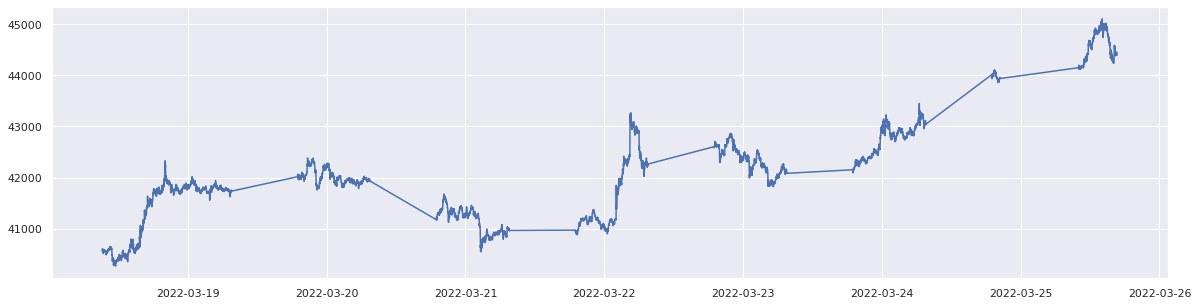

In [63]:
# Example Bitcoin
plt.plot(df['Timestamp'], df['BTC'])
plt.show()

# 03 - Prepare data

In [64]:
def prepare_data(df):
  price_cols = [col for col in df.columns[1:] if "_VOL24" not in col]
  vol_cols = [col for col in df.columns[1:] if "_VOL24" in col]
  
  # Ensure we have data with equally separated intervals
  df = df.set_index('Timestamp').resample('45s').mean().dropna()

  # Stack
  df_prices = df[price_cols].stack().reset_index().rename(columns={'level_1':'Crypto', 0:'Price'})
  df_vol = df[vol_cols].stack().reset_index().rename(columns={'level_1':'Crypto', 0:'Vol24h'})
  df_vol['Crypto'] = [crypto_i.split("_")[0] for crypto_i in df_vol['Crypto']]

  # Get both prices and volumes together
  df = pd.merge(df_prices, df_vol, how='left', on=['Timestamp', 'Crypto']).reset_index(drop=True)
  del df_prices, df_vol 

  return df

In [65]:
df = prepare_data(df)
df

Timestamp Crypto         Price        Vol24h
0     2022-03-18 09:12:00    BTC  40562.502806  3.649734e+09
1     2022-03-18 09:12:00    ETH   2802.987669  3.595527e+09
2     2022-03-18 09:12:00    BNB    388.140788  3.372194e+08
3     2022-03-18 09:12:00   LUNA     83.733926  7.022888e+08
4     2022-03-18 09:12:00    XRP      0.785357  3.444767e+08
...                   ...    ...           ...           ...
74075 2022-03-25 16:37:30    ADA      1.100124  8.859713e+08
74076 2022-03-25 16:37:30    SOL     99.763381  9.357398e+08
74077 2022-03-25 16:37:30   AVAX     84.485016  4.549415e+08
74078 2022-03-25 16:37:30    DOT     20.643396  2.872487e+08
74079 2022-03-25 16:37:30   DOGE      0.131986  3.240196e+08

[74080 rows x 4 columns]

# 04 - Create Variables

In [66]:
crypto_list = list(df['Crypto'].unique())
crypto_list

['BTC', 'ETH', 'BNB', 'LUNA', 'XRP', 'ADA', 'SOL', 'AVAX', 'DOT', 'DOGE']

In [67]:
# Install talib (can take 2-3 min)
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') # Can't use !cd in co-lab
!./configure --prefix=/usr
!make
!make install
os.chdir('../')
!pip install TA-Lib

--2022-03-25 16:38:15--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-03-25 16:38:15--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-03-25 16:38:15--  http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving phoenixna

In [68]:
import talib

## 04_01 - Trend Variables
Owner: Cristina https://github.com/CCienfu

### 04_01_01 - SMA 

A simple moving average (SMA) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range.

Pongo de ejemplo perido 10 y 50 pero habria que escoger los mejores para modelo predictivo

In [69]:
# Using TA-LIB
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  df.loc[filter_crypto_i, 'SMA10'] = talib.SMA(df.loc[filter_crypto_i, 'Price'], 10)
  df.loc[filter_crypto_i, 'SMA50'] = talib.SMA(df.loc[filter_crypto_i, 'Price'], 50)
  df.loc[filter_crypto_i, 'SMA100'] = talib.SMA(df.loc[filter_crypto_i, 'Price'], 100)
df.tail()

Timestamp Crypto      Price        Vol24h      SMA10  \
74075 2022-03-25 16:37:30    ADA   1.100124  8.859713e+08   1.101739   
74076 2022-03-25 16:37:30    SOL  99.763381  9.357398e+08  99.942212   
74077 2022-03-25 16:37:30   AVAX  84.485016  4.549415e+08  84.545116   
74078 2022-03-25 16:37:30    DOT  20.643396  2.872487e+08  20.673562   
74079 2022-03-25 16:37:30   DOGE   0.131986  3.240196e+08   0.132130   

            SMA50      SMA100  
74075    1.101752    1.102137  
74076  100.169612  100.294363  
74077   84.633846   84.731962  
74078   20.695807   20.707298  
74079    0.132178    0.132481

### 04_01_02 - EMA
A simple moving average can be enhanced as an exponential moving average (EMA) that is more heavily weighted on recent price action.

The major difference between an exponential moving average (EMA) and a simple moving average is the sensitivity each one shows to changes in the data used in its calculation. More specifically, the EMA gives a higher weighting to recent prices, while the SMA assigns an equal weighting to all values.

In [70]:
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  df.loc[filter_crypto_i, 'EMA10'] = talib.EMA(df.loc[filter_crypto_i, 'Price'], 10)
  df.loc[filter_crypto_i, 'EMA50'] = talib.EMA(df.loc[filter_crypto_i, 'Price'], 50)
  df.loc[filter_crypto_i, 'EMA100'] = talib.EMA(df.loc[filter_crypto_i, 'Price'], 100)
df.tail()

Timestamp Crypto      Price        Vol24h      SMA10  \
74075 2022-03-25 16:37:30    ADA   1.100124  8.859713e+08   1.101739   
74076 2022-03-25 16:37:30    SOL  99.763381  9.357398e+08  99.942212   
74077 2022-03-25 16:37:30   AVAX  84.485016  4.549415e+08  84.545116   
74078 2022-03-25 16:37:30    DOT  20.643396  2.872487e+08  20.673562   
74079 2022-03-25 16:37:30   DOGE   0.131986  3.240196e+08   0.132130   

            SMA50      SMA100      EMA10       EMA50      EMA100  
74075    1.101752    1.102137   1.101513    1.102093    1.104837  
74076  100.169612  100.294363  99.925390  100.150523  100.512418  
74077   84.633846   84.731962  84.542377   84.642930   84.858727  
74078   20.695807   20.707298  20.675866   20.700475   20.740867  
74079    0.132178    0.132481   0.132142    0.132261    0.132679

### 04_01_03 - Plot

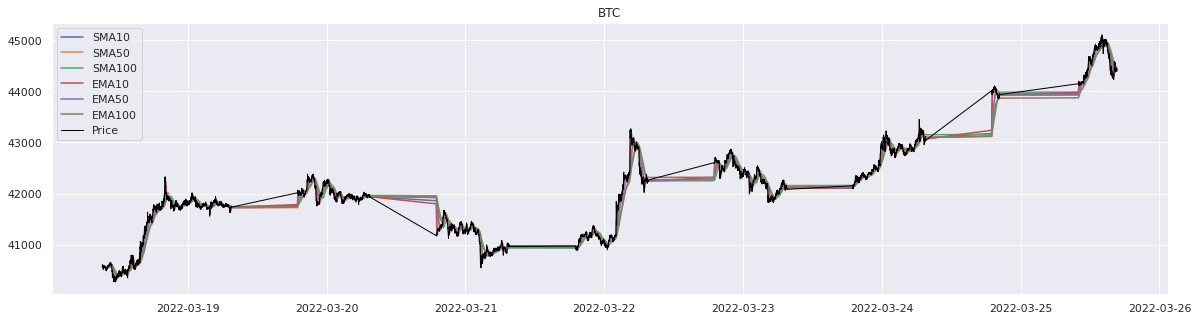

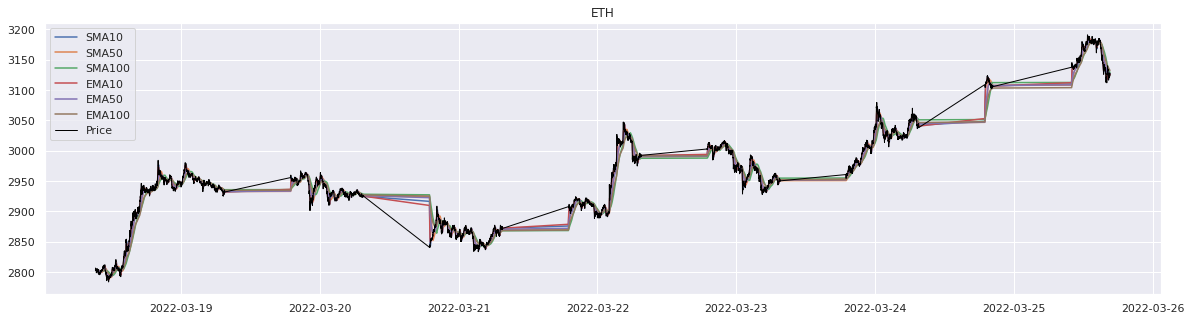

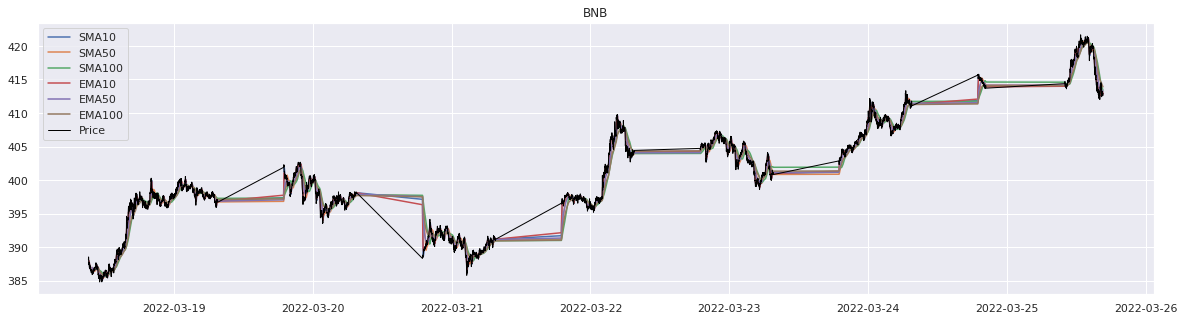

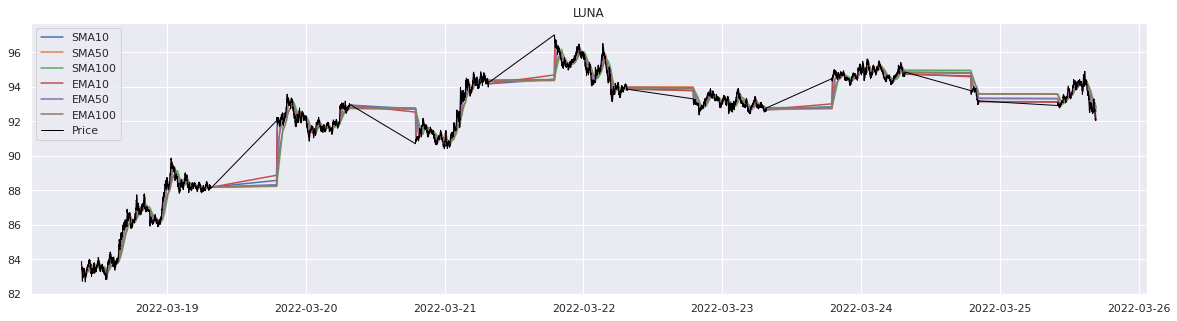

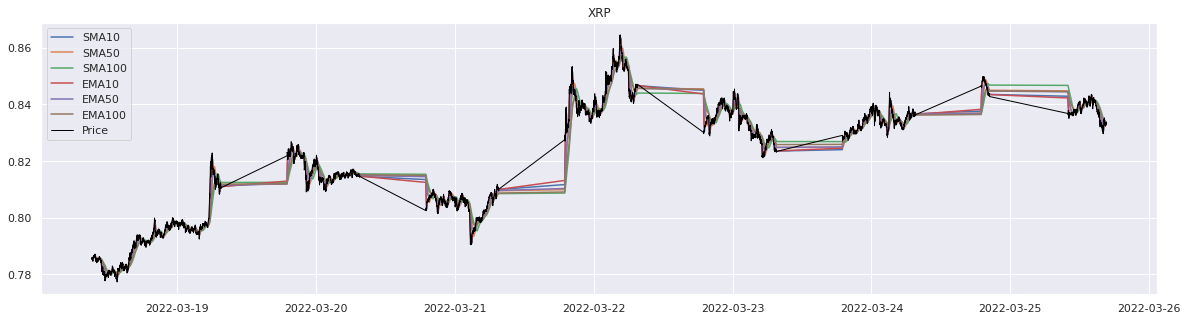

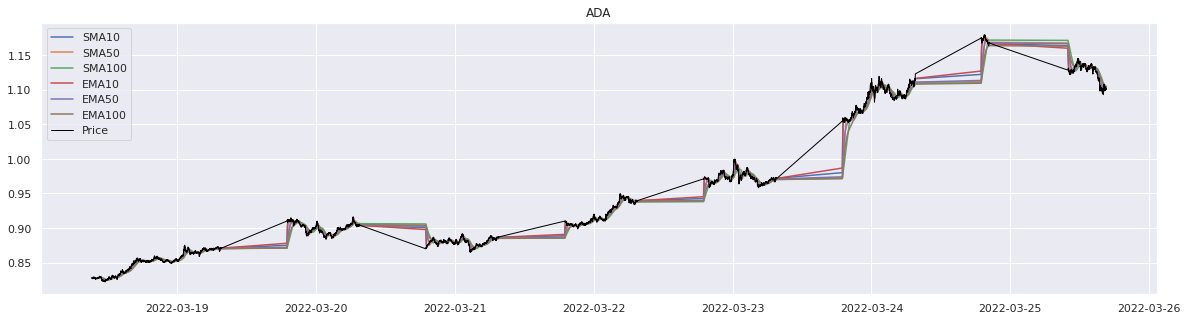

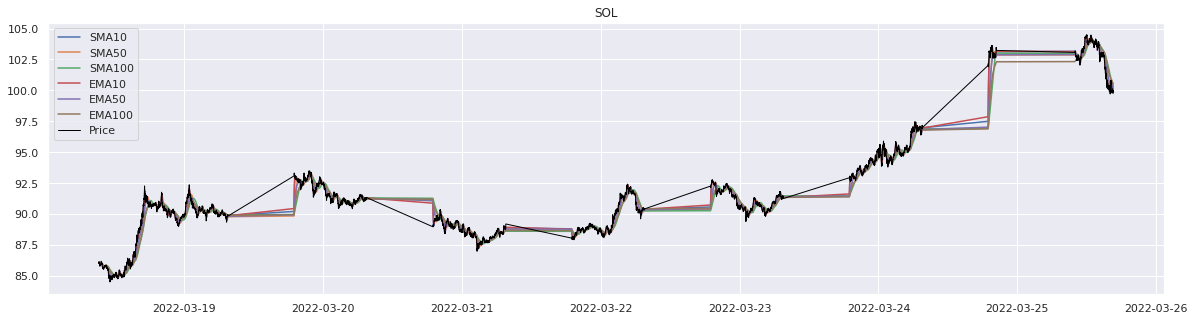

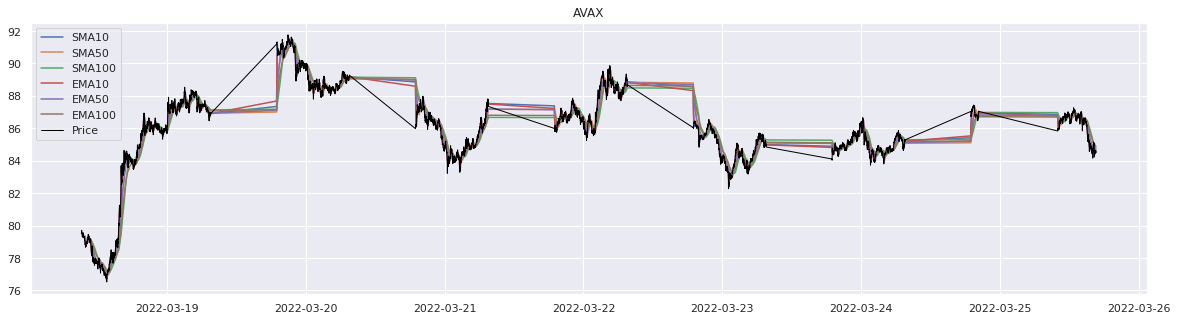

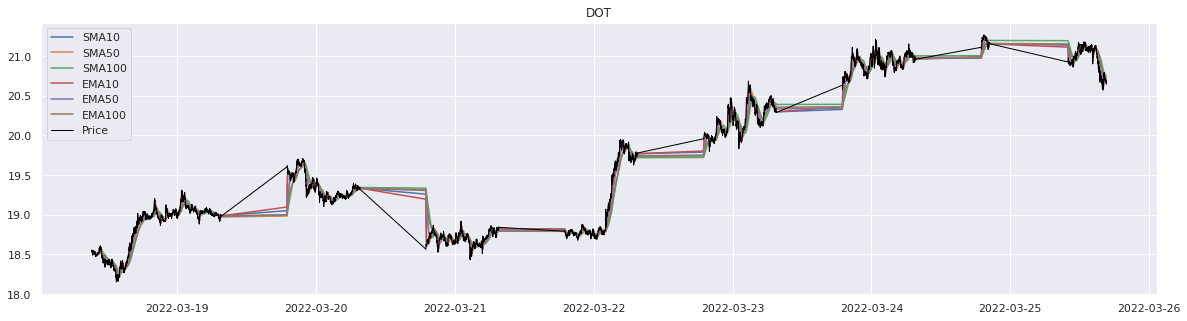

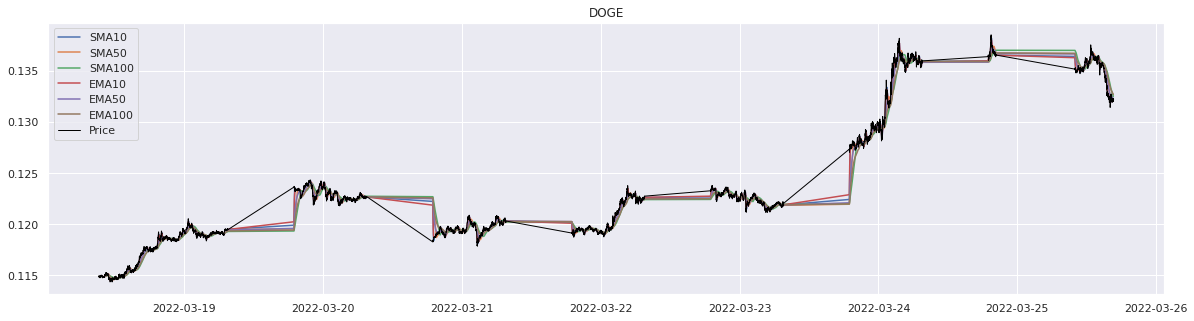

In [71]:
sma_cols = [col for col in df.columns if "SMA" in col]
ema_cols = [col for col in df.columns if "EMA" in col]
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  for col in sma_cols + ema_cols:
    plt.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, col], label=col)
  plt.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, 'Price'], linewidth=1, color='black', label='Price')
  plt.title(crypto_i)
  plt.legend()
  plt.show()

## 04_02 - Volume Variables
Owners: 
- Álvaro Cascón https://github.com/alvarocascon
- Álvaro Forner https://github.com/alvaroforner

### 04_02_01 - Delta Volume
Create a variable that takes evolution of Vol24h into account to assess latest volume changes (over last 7.5 mins).

In [72]:
# Create DeltaVol24h
for crypto_i in crypto_list:
    filter_crypto_i = df['Crypto']==crypto_i
    df.loc[filter_crypto_i, 'DeltaVol24h'] = df.loc[filter_crypto_i, 'Vol24h'] - df.loc[filter_crypto_i, 'Vol24h'].shift(1)
    df.loc[((filter_crypto_i)&(df['DeltaVol24h']<0)), 'DeltaVol24h'] = np.NaN
    df.loc[filter_crypto_i, 'DeltaVol24h'] = df.loc[filter_crypto_i, 'DeltaVol24h'].rolling(10, min_periods=1).median()

df.tail(20)

Timestamp Crypto         Price        Vol24h         SMA10  \
74060 2022-03-25 16:36:45    BTC  44438.034179  5.976447e+09  44428.117345   
74061 2022-03-25 16:36:45    ETH   3126.815802  4.293151e+09   3126.236949   
74062 2022-03-25 16:36:45    BNB    412.841857  3.929850e+08    412.895340   
74063 2022-03-25 16:36:45   LUNA     92.048071  5.747472e+08     92.075329   
74064 2022-03-25 16:36:45    XRP      0.833433  3.896556e+08      0.833240   
74065 2022-03-25 16:36:45    ADA      1.101406  8.866085e+08      1.101999   
74066 2022-03-25 16:36:45    SOL     99.904975  9.366795e+08     99.963647   
74067 2022-03-25 16:36:45   AVAX     84.544543  4.549511e+08     84.557933   
74068 2022-03-25 16:36:45    DOT     20.680590  2.875707e+08     20.677869   
74069 2022-03-25 16:36:45   DOGE      0.132212  3.243626e+08      0.132155   
74070 2022-03-25 16:37:30    BTC  44382.912369  5.972074e+09  44422.739921   
74071 2022-03-25 16:37:30    ETH   3122.994961  4.291008e+09   3126.036710   
74072 2022-03-25 16:37:30    BNB    412.598502  3.929367e+08    412.855943   
74073 2022-03-25 16:37:30   LUNA     92.056686  5.754867e+08     92.072447   
74074 2022-03-25 16:37:30    XRP      0.832892  3.896686e+08      0.833256   
74075 2022-03-25 16:37:30    ADA      1.100124  8.859713e+08      1.101739   
74076 2022-03-25 16:37:30    SOL     99.763381  9.357398e+08     99.942212   
74077 2022-03-25 16:37:30   AVAX     84.485016  4.549415e+08     84.545116   
74078 2022-03-25 16:37:30    DOT     20.643396  2.872487e+08     20.673562   
74079 2022-03-25 16:37:30   DOGE      0.131986  3.240196e+08      0.132130   

              SMA50        SMA100         EMA10         EMA50        EMA100  \
74060  44418.516345  44407.725996  44432.798534  44426.910535  44468.617802   
74061   3125.206526   3128.735684   3126.273514   3126.618139   3132.580656   
74062    413.135869    413.408912    412.906490    413.178847    413.929085   
74063     92.659610     92.775347     92.124849     92.561565     92.835829   
74064      0.832871      0.833074      0.833322      0.833143      0.833811   
74065      1.101749      1.102258      1.101821      1.102173      1.104932   
74066    100.179853    100.305732     99.961392    100.166324    100.527550   
74067     84.638861     84.738577     84.555124     84.649375     84.866277   
74068     20.696681     20.708780     20.683082     20.702805     20.742836   
74069      0.132183      0.132499      0.132177      0.132272      0.132693   
74070  44419.589214  44405.817129  44423.728322  44425.185116  44466.920665   
74071   3125.233100   3128.528392   3125.677413   3126.476054   3132.390841   
74072    413.122857    413.383196    412.850492    413.156089    413.902737   
74073     92.646190     92.763529     92.112456     92.541766     92.820401   
74074      0.832884      0.833049      0.833244      0.833133      0.833793   
74075      1.101752      1.102137      1.101513      1.102093      1.104837   
74076    100.169612    100.294363     99.925390    100.150523    100.512418   
74077     84.633846     84.731962     84.542377     84.642930     84.858727   
74078     20.695807     20.707298     20.675866     20.700475     20.740867   
74079      0.132178      0.132481      0.132142      0.132261      0.132679   

        DeltaVol24h  
74060  2.722657e+06  
74061  2.151994e+06  
74062  1.545176e+05  
74063  3.558259e+05  
74064  1.110079e+05  
74065  2.958326e+05  
74066  2.880082e+05  
74067  1.513420e+05  
74068  2.940872e+05  
74069  4.175645e+05  
74070  2.722657e+06  
74071  2.151994e+06  
74072  1.545176e+05  
74073  3.764810e+05  
74074  1.045801e+05  
74075  2.958326e+05  
74076  2.880082e+05  
74077  1.513420e+05  
74078  2.940872e+05  
74079  4.175645e+05

### 04_02_02 Volume Trend and Momentum

In [73]:
# Example
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  df.loc[filter_crypto_i, 'DeltaVol>EMA20'] = (df.loc[filter_crypto_i, 'DeltaVol24h']>talib.EMA(df.loc[filter_crypto_i, 'DeltaVol24h'], 20)).astype(int)
  df.loc[filter_crypto_i, 'DeltaVol>90roll200'] = (df.loc[filter_crypto_i, 'DeltaVol24h']>df.loc[filter_crypto_i, 'DeltaVol24h'].rolling(200,min_periods=1).quantile(0.90)).astype(int)
df.tail()

Timestamp Crypto      Price        Vol24h      SMA10  \
74075 2022-03-25 16:37:30    ADA   1.100124  8.859713e+08   1.101739   
74076 2022-03-25 16:37:30    SOL  99.763381  9.357398e+08  99.942212   
74077 2022-03-25 16:37:30   AVAX  84.485016  4.549415e+08  84.545116   
74078 2022-03-25 16:37:30    DOT  20.643396  2.872487e+08  20.673562   
74079 2022-03-25 16:37:30   DOGE   0.131986  3.240196e+08   0.132130   

            SMA50      SMA100      EMA10       EMA50      EMA100  \
74075    1.101752    1.102137   1.101513    1.102093    1.104837   
74076  100.169612  100.294363  99.925390  100.150523  100.512418   
74077   84.633846   84.731962  84.542377   84.642930   84.858727   
74078   20.695807   20.707298  20.675866   20.700475   20.740867   
74079    0.132178    0.132481   0.132142    0.132261    0.132679   

         DeltaVol24h  DeltaVol>EMA20  DeltaVol>90roll200  
74075  295832.567164             0.0                 0.0  
74076  288008.156195             0.0                 0.0  
74077  151341.954638             0.0                 0.0  
74078  294087.245616             1.0                 0.0  
74079  417564.536912             0.0                 0.0

### 04_02_03 - Plot
Compare volumen last 24h versus the delta variable we create.

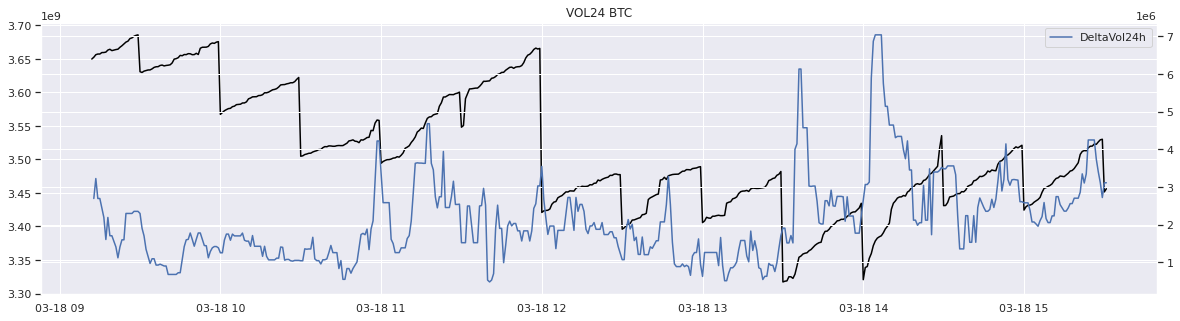

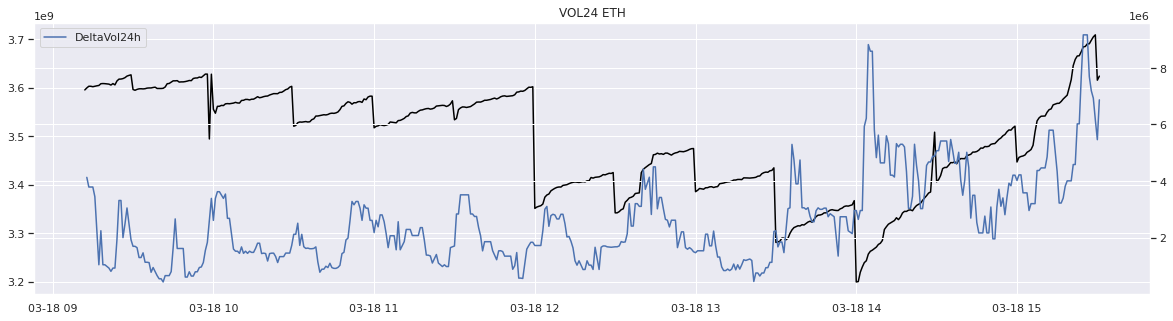

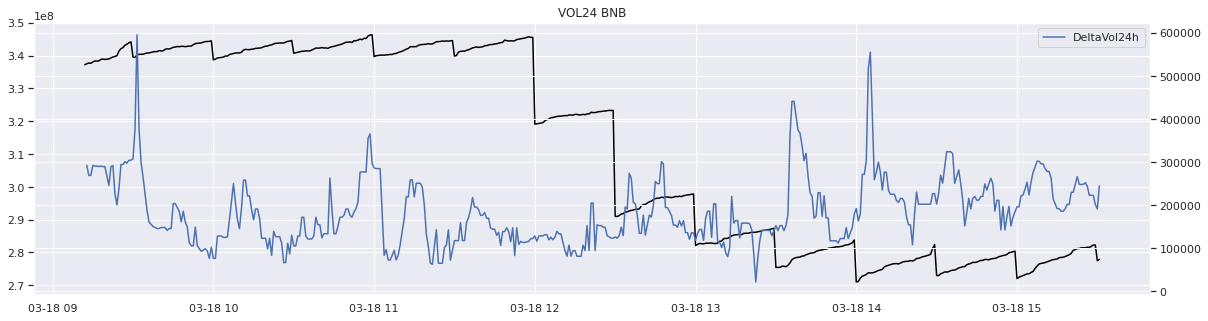

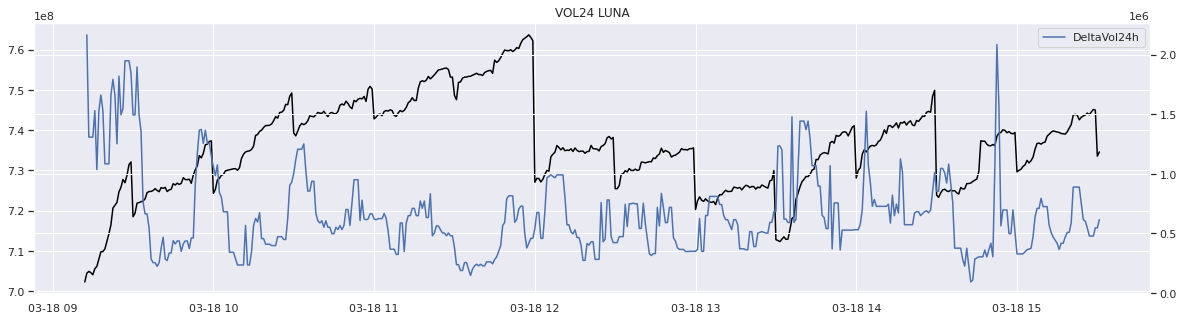

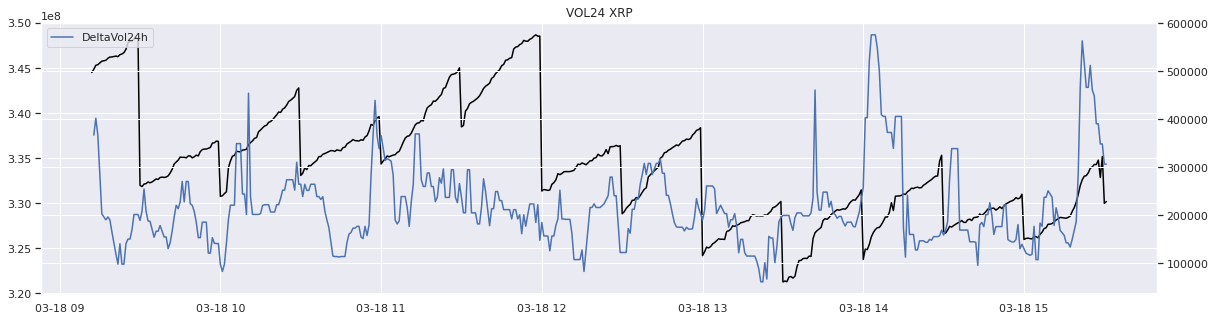

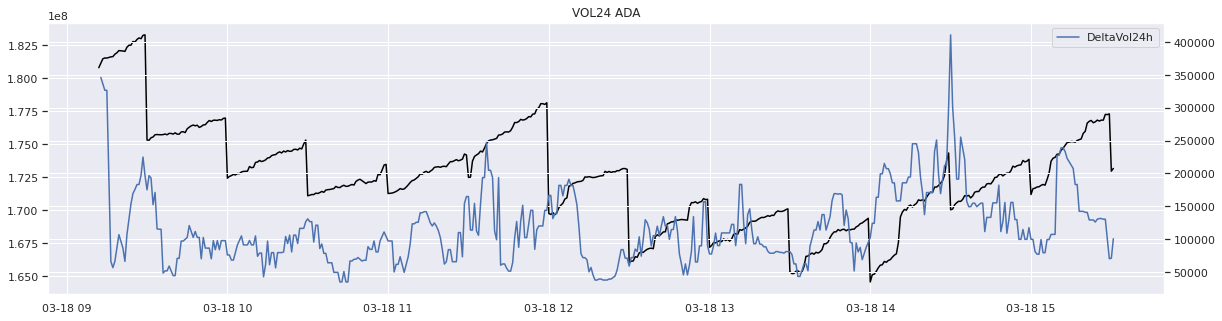

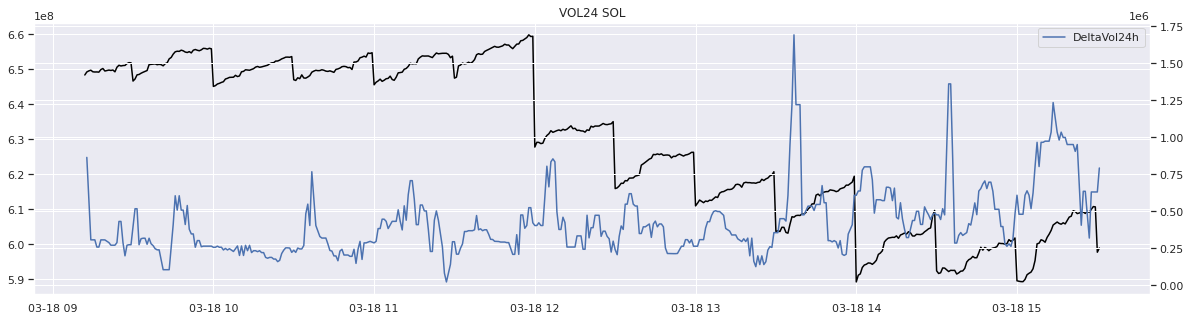

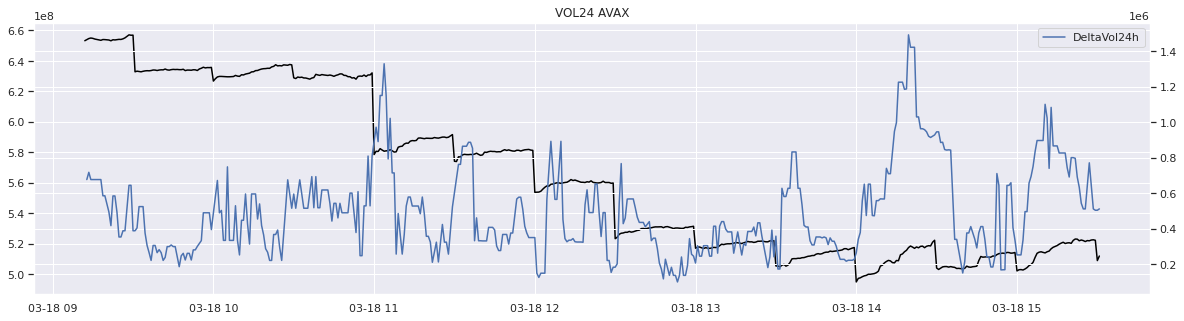

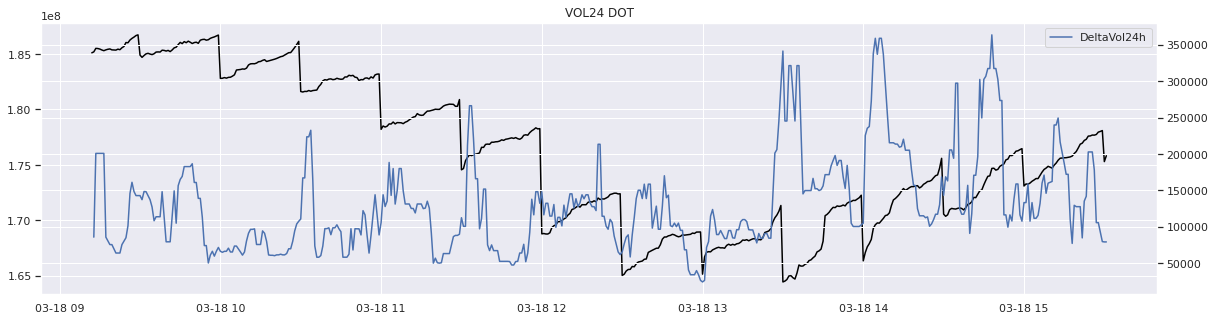

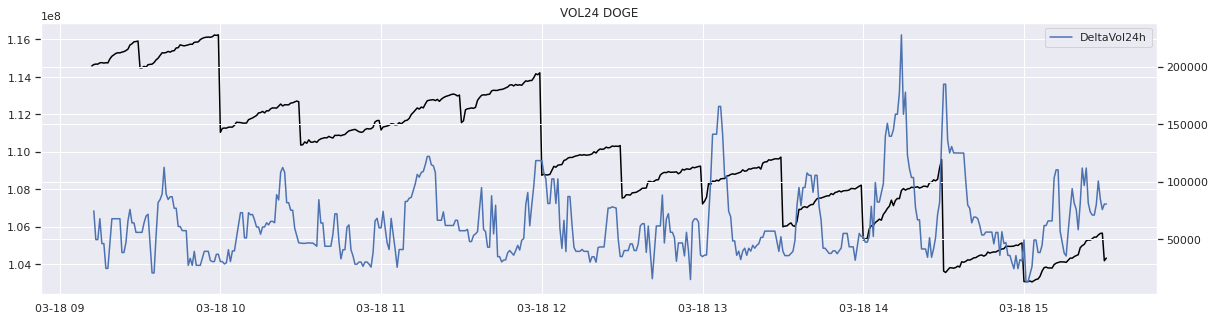

In [74]:
# Original volume variable vs delta
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()
  ax1.plot(df.loc[filter_crypto_i, 'Timestamp'].iloc[:500], df.loc[filter_crypto_i, 'Vol24h'].iloc[:500], label='Vol24h', color='black')
  ax2.plot(df.loc[filter_crypto_i, 'Timestamp'].iloc[:500], df.loc[filter_crypto_i, 'DeltaVol24h'].iloc[:500], label='DeltaVol24h')
  plt.title("VOL24 " + crypto_i)
  plt.legend()
  plt.show()

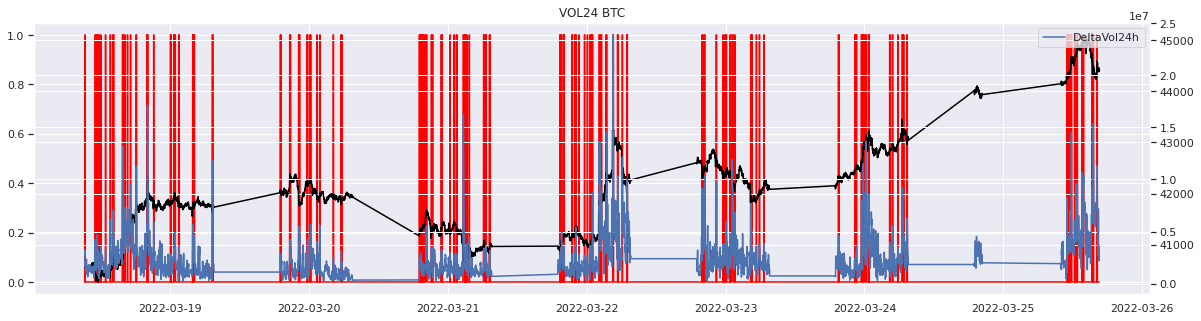

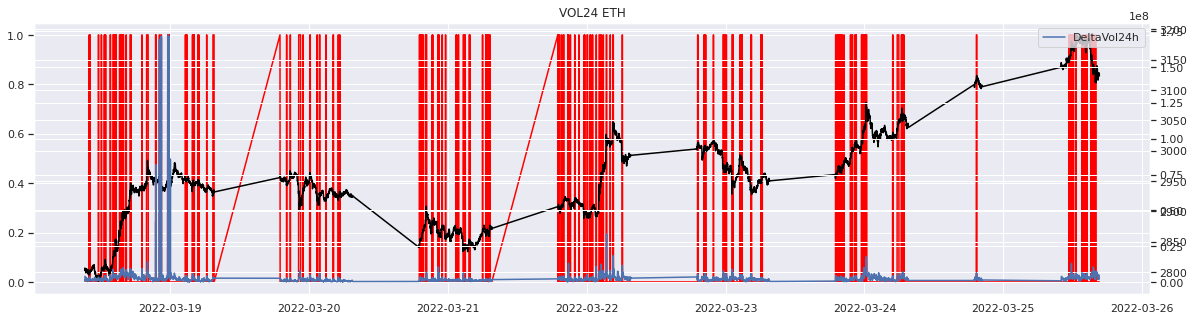

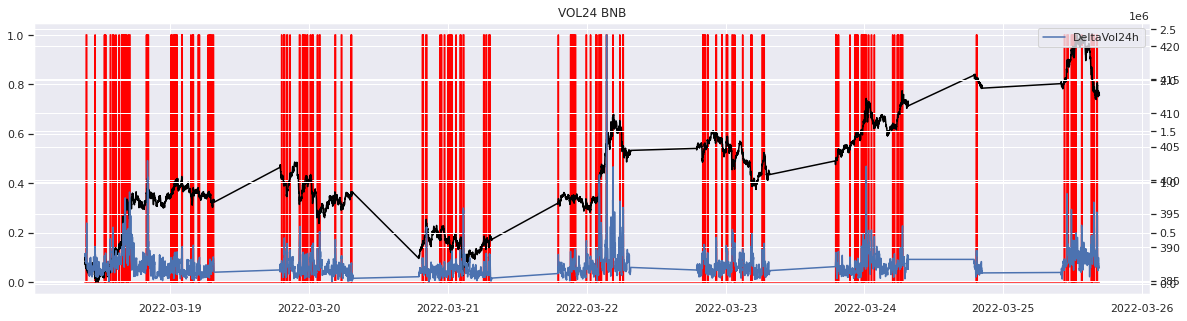

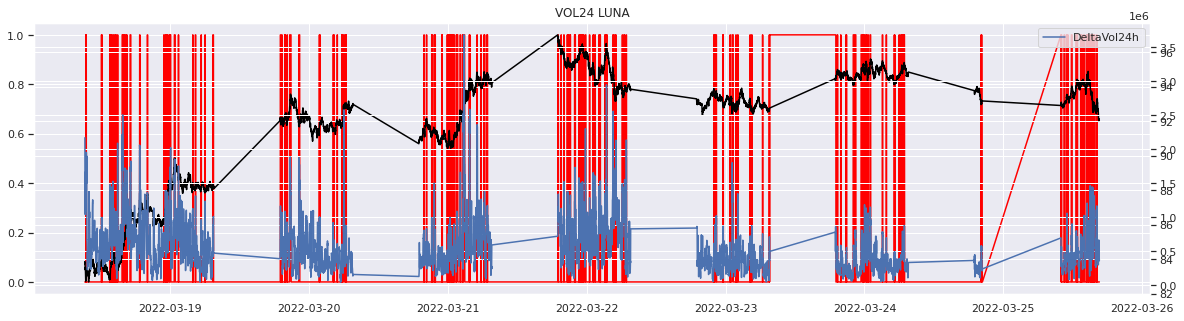

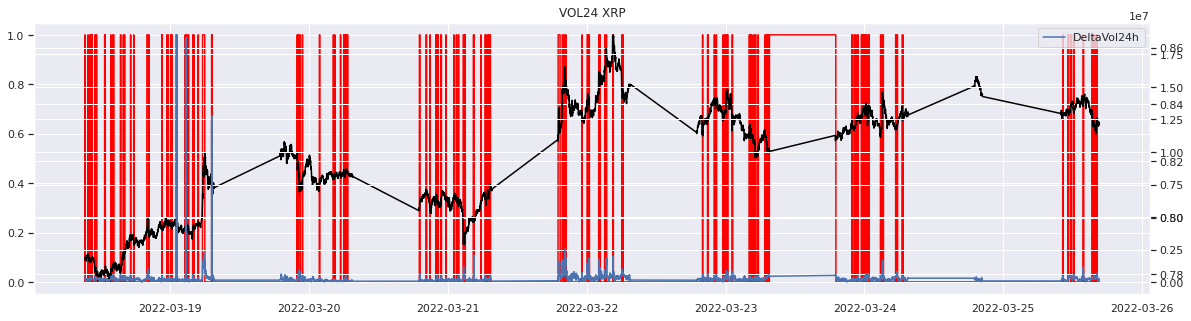

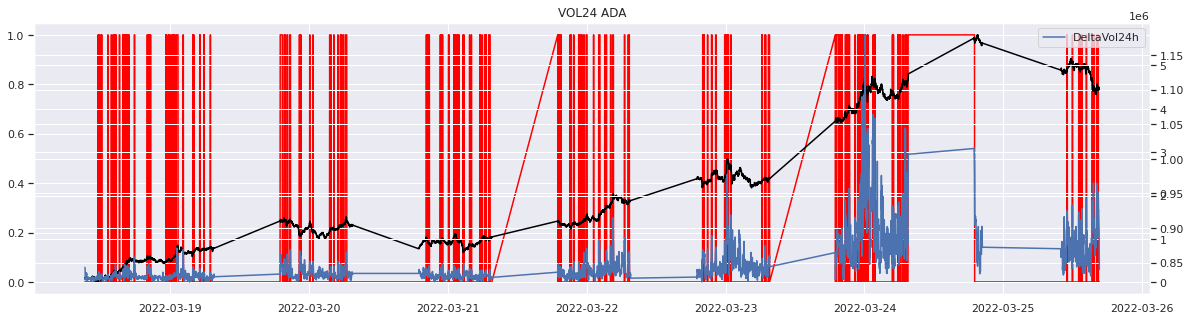

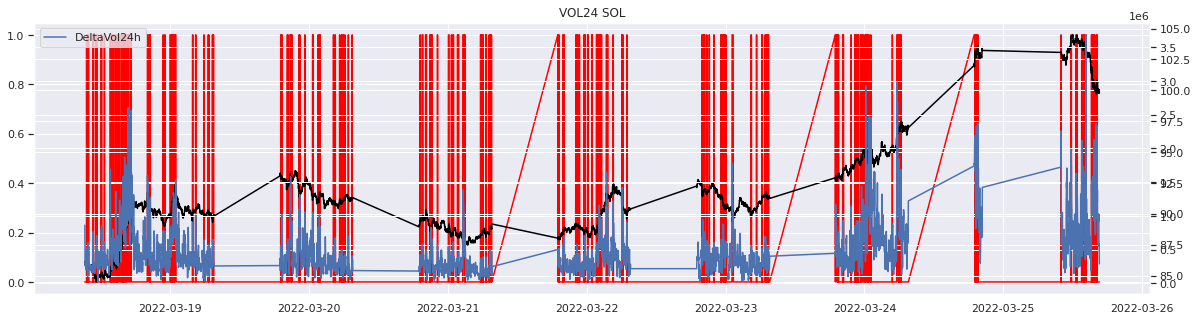

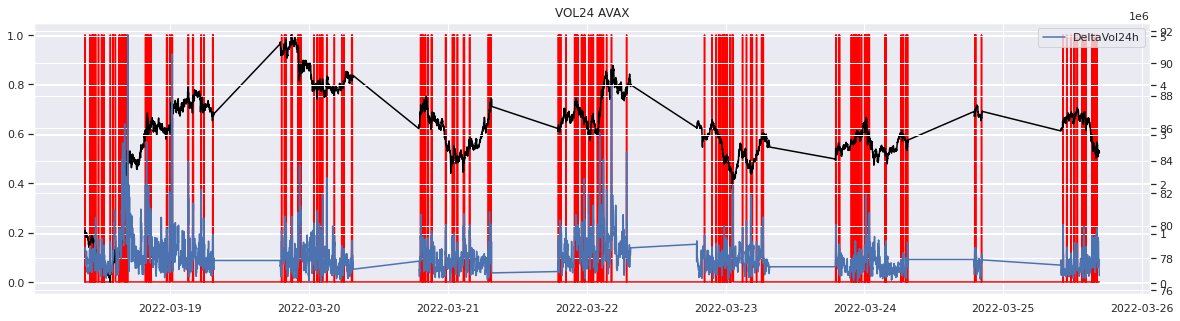

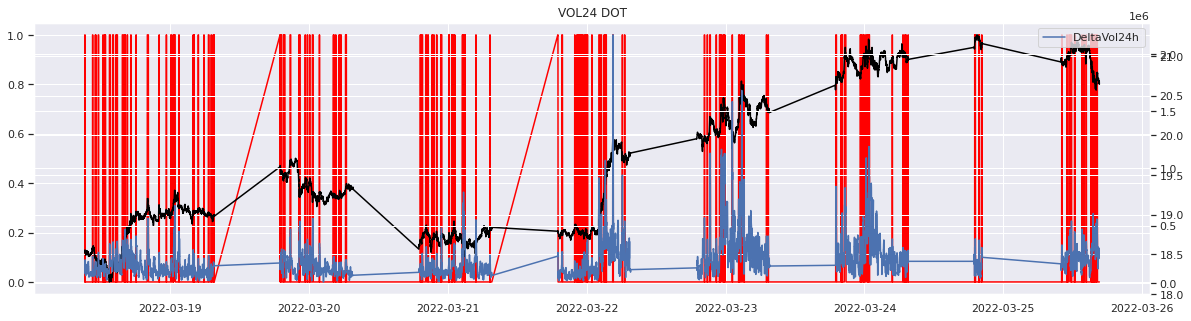

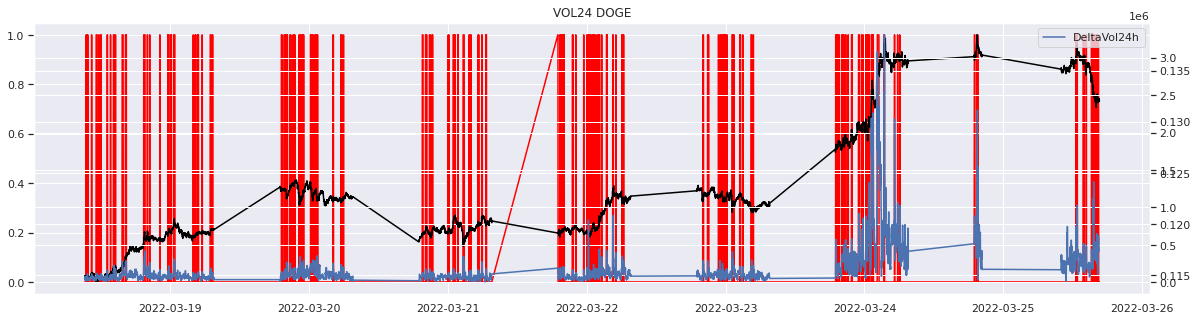

In [75]:
# Volume Value vs price
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()
  ax3 = ax1.twinx()
  ax1.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, 'DeltaVol>90roll200'], label='DeltaVol>90roll200', color = 'red')
  ax2.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, 'Price'], label='Price', color='black')
  ax3.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, 'DeltaVol24h'], label='DeltaVol24h')
  plt.title("VOL24 " + crypto_i)
  plt.legend()
  plt.show()

## 04_03 - Momentum Variables
Owner: Salvador https://github.com/gitsalva

### 04_03_01 - ROC
Rate of Change (ROC): momentum-based technical indicator that measures the percentage change in price between the current price and the price a certain number of periods ago.

https://www.investopedia.com/terms/r/rateofchange.asp


In [76]:
# Create ROC
period_roc = 50
for crypto_i in crypto_list:
    filter_crypto_i = df['Crypto']==crypto_i
    df.loc[filter_crypto_i, 'ROC'+str(period_roc)] = talib.ROC(df.loc[filter_crypto_i, 'Price'], period_roc)

df.tail()

Timestamp Crypto      Price        Vol24h      SMA10  \
74075 2022-03-25 16:37:30    ADA   1.100124  8.859713e+08   1.101739   
74076 2022-03-25 16:37:30    SOL  99.763381  9.357398e+08  99.942212   
74077 2022-03-25 16:37:30   AVAX  84.485016  4.549415e+08  84.545116   
74078 2022-03-25 16:37:30    DOT  20.643396  2.872487e+08  20.673562   
74079 2022-03-25 16:37:30   DOGE   0.131986  3.240196e+08   0.132130   

            SMA50      SMA100      EMA10       EMA50      EMA100  \
74075    1.101752    1.102137   1.101513    1.102093    1.104837   
74076  100.169612  100.294363  99.925390  100.150523  100.512418   
74077   84.633846   84.731962  84.542377   84.642930   84.858727   
74078   20.695807   20.707298  20.675866   20.700475   20.740867   
74079    0.132178    0.132481   0.132142    0.132261    0.132679   

         DeltaVol24h  DeltaVol>EMA20  DeltaVol>90roll200     ROC50  
74075  295832.567164             0.0                 0.0  0.012806  
74076  288008.156195             0.0                 0.0 -0.510608  
74077  151341.954638             0.0                 0.0 -0.295950  
74078  294087.245616             1.0                 0.0 -0.211070  
74079  417564.536912             0.0                 0.0 -0.194522

### 04_03_02 - MOM
The momentum oscillator measures the amount that a security has changed in a certain period over a certain period. 

In [77]:
# Create MOM
period_mom = 50
for crypto_i in crypto_list:
    filter_crypto_i = df['Crypto']==crypto_i
    df.loc[filter_crypto_i, 'MOM'+str(period_mom)] = talib.MOM(df.loc[filter_crypto_i, 'Price'], period_mom)

df.tail()

Timestamp Crypto      Price        Vol24h      SMA10  \
74075 2022-03-25 16:37:30    ADA   1.100124  8.859713e+08   1.101739   
74076 2022-03-25 16:37:30    SOL  99.763381  9.357398e+08  99.942212   
74077 2022-03-25 16:37:30   AVAX  84.485016  4.549415e+08  84.545116   
74078 2022-03-25 16:37:30    DOT  20.643396  2.872487e+08  20.673562   
74079 2022-03-25 16:37:30   DOGE   0.131986  3.240196e+08   0.132130   

            SMA50      SMA100      EMA10       EMA50      EMA100  \
74075    1.101752    1.102137   1.101513    1.102093    1.104837   
74076  100.169612  100.294363  99.925390  100.150523  100.512418   
74077   84.633846   84.731962  84.542377   84.642930   84.858727   
74078   20.695807   20.707298  20.675866   20.700475   20.740867   
74079    0.132178    0.132481   0.132142    0.132261    0.132679   

         DeltaVol24h  DeltaVol>EMA20  DeltaVol>90roll200     ROC50     MOM50  
74075  295832.567164             0.0                 0.0  0.012806  0.000141  
74076  288008.156195             0.0                 0.0 -0.510608 -0.512014  
74077  151341.954638             0.0                 0.0 -0.295950 -0.250776  
74078  294087.245616             1.0                 0.0 -0.211070 -0.043664  
74079  417564.536912             0.0                 0.0 -0.194522 -0.000257

### 04_03_03 - CMO
The formula calculates the difference between the sum of recent gains and the sum of recent losses and then divides the result by the sum of all price movements over the same period.

In [78]:
# Create CMO
period_cmo = 100
for crypto_i in crypto_list:
    filter_crypto_i = df['Crypto']==crypto_i
    df.loc[filter_crypto_i, 'CMO'+str(period_cmo)] = talib.CMO(df.loc[filter_crypto_i, 'Price'], period_cmo)

df.tail()

Timestamp Crypto      Price        Vol24h      SMA10  \
74075 2022-03-25 16:37:30    ADA   1.100124  8.859713e+08   1.101739   
74076 2022-03-25 16:37:30    SOL  99.763381  9.357398e+08  99.942212   
74077 2022-03-25 16:37:30   AVAX  84.485016  4.549415e+08  84.545116   
74078 2022-03-25 16:37:30    DOT  20.643396  2.872487e+08  20.673562   
74079 2022-03-25 16:37:30   DOGE   0.131986  3.240196e+08   0.132130   

            SMA50      SMA100      EMA10       EMA50      EMA100  \
74075    1.101752    1.102137   1.101513    1.102093    1.104837   
74076  100.169612  100.294363  99.925390  100.150523  100.512418   
74077   84.633846   84.731962  84.542377   84.642930   84.858727   
74078   20.695807   20.707298  20.675866   20.700475   20.740867   
74079    0.132178    0.132481   0.132142    0.132261    0.132679   

         DeltaVol24h  DeltaVol>EMA20  DeltaVol>90roll200     ROC50     MOM50  \
74075  295832.567164             0.0                 0.0  0.012806  0.000141   
74076  288008.156195             0.0                 0.0 -0.510608 -0.512014   
74077  151341.954638             0.0                 0.0 -0.295950 -0.250776   
74078  294087.245616             1.0                 0.0 -0.211070 -0.043664   
74079  417564.536912             0.0                 0.0 -0.194522 -0.000257   

          CMO100  
74075  -9.786498  
74076 -14.181447  
74077 -10.411821  
74078 -10.534482  
74079 -12.528865

### 04_03_04 - Buying Indicators

In [79]:
# ROC
#Zero-line crossovers can be used to signal trend changes. 
df['ROCLowerThan0'] = (df['ROC'+str(period_roc)]<0).astype(int)
df['ROCHigherThan0'] = (df['ROC'+str(period_roc)]>0).astype(int)
df.tail()

Timestamp Crypto      Price        Vol24h      SMA10  \
74075 2022-03-25 16:37:30    ADA   1.100124  8.859713e+08   1.101739   
74076 2022-03-25 16:37:30    SOL  99.763381  9.357398e+08  99.942212   
74077 2022-03-25 16:37:30   AVAX  84.485016  4.549415e+08  84.545116   
74078 2022-03-25 16:37:30    DOT  20.643396  2.872487e+08  20.673562   
74079 2022-03-25 16:37:30   DOGE   0.131986  3.240196e+08   0.132130   

            SMA50      SMA100      EMA10       EMA50      EMA100  \
74075    1.101752    1.102137   1.101513    1.102093    1.104837   
74076  100.169612  100.294363  99.925390  100.150523  100.512418   
74077   84.633846   84.731962  84.542377   84.642930   84.858727   
74078   20.695807   20.707298  20.675866   20.700475   20.740867   
74079    0.132178    0.132481   0.132142    0.132261    0.132679   

         DeltaVol24h  DeltaVol>EMA20  DeltaVol>90roll200     ROC50     MOM50  \
74075  295832.567164             0.0                 0.0  0.012806  0.000141   
74076  288008.156195             0.0                 0.0 -0.510608 -0.512014   
74077  151341.954638             0.0                 0.0 -0.295950 -0.250776   
74078  294087.245616             1.0                 0.0 -0.211070 -0.043664   
74079  417564.536912             0.0                 0.0 -0.194522 -0.000257   

          CMO100  ROCLowerThan0  ROCHigherThan0  
74075  -9.786498              0               1  
74076 -14.181447              1               0  
74077 -10.411821              1               0  
74078 -10.534482              1               0  
74079 -12.528865              1               0

In [80]:
# MOM 
#Crossing above the zero line during an uptrend would be a buy signal and a crossing below the 
#zero line during a downtrend would be a sell short signal.
df['MOMLowerThan0'] = (df['MOM'+str(period_mom)]<0).astype(int)
df['MOMHigherThan0'] = (df['MOM'+str(period_mom)]>0).astype(int)
df.tail()

Timestamp Crypto      Price        Vol24h      SMA10  \
74075 2022-03-25 16:37:30    ADA   1.100124  8.859713e+08   1.101739   
74076 2022-03-25 16:37:30    SOL  99.763381  9.357398e+08  99.942212   
74077 2022-03-25 16:37:30   AVAX  84.485016  4.549415e+08  84.545116   
74078 2022-03-25 16:37:30    DOT  20.643396  2.872487e+08  20.673562   
74079 2022-03-25 16:37:30   DOGE   0.131986  3.240196e+08   0.132130   

            SMA50      SMA100      EMA10       EMA50      EMA100  \
74075    1.101752    1.102137   1.101513    1.102093    1.104837   
74076  100.169612  100.294363  99.925390  100.150523  100.512418   
74077   84.633846   84.731962  84.542377   84.642930   84.858727   
74078   20.695807   20.707298  20.675866   20.700475   20.740867   
74079    0.132178    0.132481   0.132142    0.132261    0.132679   

         DeltaVol24h  DeltaVol>EMA20  DeltaVol>90roll200     ROC50     MOM50  \
74075  295832.567164             0.0                 0.0  0.012806  0.000141   
74076  288008.156195             0.0                 0.0 -0.510608 -0.512014   
74077  151341.954638             0.0                 0.0 -0.295950 -0.250776   
74078  294087.245616             1.0                 0.0 -0.211070 -0.043664   
74079  417564.536912             0.0                 0.0 -0.194522 -0.000257   

          CMO100  ROCLowerThan0  ROCHigherThan0  MOMLowerThan0  MOMHigherThan0  
74075  -9.786498              0               1              0               1  
74076 -14.181447              1               0              1               0  
74077 -10.411821              1               0              1               0  
74078 -10.534482              1               0              1               0  
74079 -12.528865              1               0              1               0

In [81]:
# CMO 
#Buy under -50, sell above 50
df['CMOHigherThan50'] = (df['CMO'+str(period_cmo)]>50).astype(int)
df['CMOLowerThan50'] = (df['CMO'+str(period_cmo)]<50).astype(int)
df['CMOLowerThan-50'] = (df['CMO'+str(period_cmo)]<-50).astype(int)
df['CMOHigherThan-50'] = (df['CMO'+str(period_cmo)]>-50).astype(int)
df.tail()

Timestamp Crypto      Price        Vol24h      SMA10  \
74075 2022-03-25 16:37:30    ADA   1.100124  8.859713e+08   1.101739   
74076 2022-03-25 16:37:30    SOL  99.763381  9.357398e+08  99.942212   
74077 2022-03-25 16:37:30   AVAX  84.485016  4.549415e+08  84.545116   
74078 2022-03-25 16:37:30    DOT  20.643396  2.872487e+08  20.673562   
74079 2022-03-25 16:37:30   DOGE   0.131986  3.240196e+08   0.132130   

            SMA50      SMA100      EMA10       EMA50      EMA100  ...  \
74075    1.101752    1.102137   1.101513    1.102093    1.104837  ...   
74076  100.169612  100.294363  99.925390  100.150523  100.512418  ...   
74077   84.633846   84.731962  84.542377   84.642930   84.858727  ...   
74078   20.695807   20.707298  20.675866   20.700475   20.740867  ...   
74079    0.132178    0.132481   0.132142    0.132261    0.132679  ...   

          MOM50     CMO100  ROCLowerThan0  ROCHigherThan0  MOMLowerThan0  \
74075  0.000141  -9.786498              0               1              0   
74076 -0.512014 -14.181447              1               0              1   
74077 -0.250776 -10.411821              1               0              1   
74078 -0.043664 -10.534482              1               0              1   
74079 -0.000257 -12.528865              1               0              1   

       MOMHigherThan0  CMOHigherThan50  CMOLowerThan50  CMOLowerThan-50  \
74075               1                0               1                0   
74076               0                0               1                0   
74077               0                0               1                0   
74078               0                0               1                0   
74079               0                0               1                0   

       CMOHigherThan-50  
74075                 1  
74076                 1  
74077                 1  
74078                 1  
74079                 1  

[5 rows x 24 columns]

### 04_04_05 - Plot

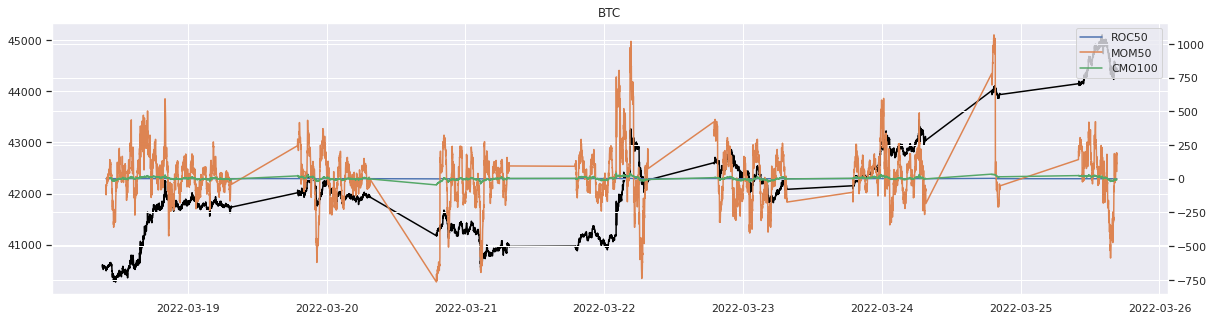

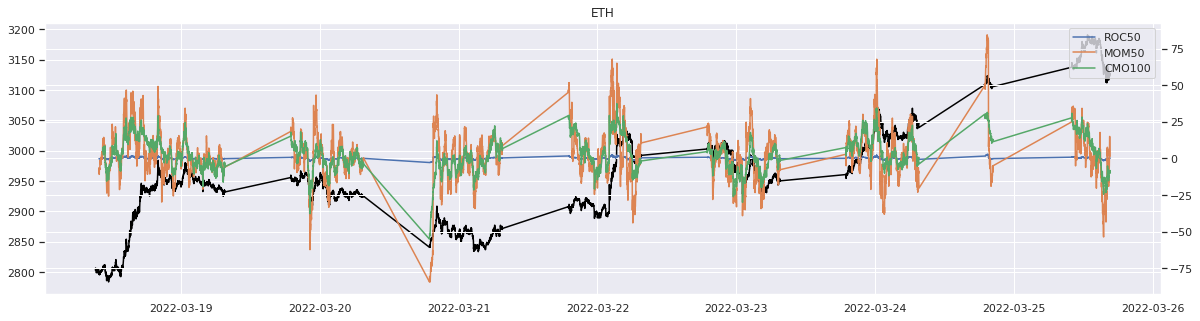

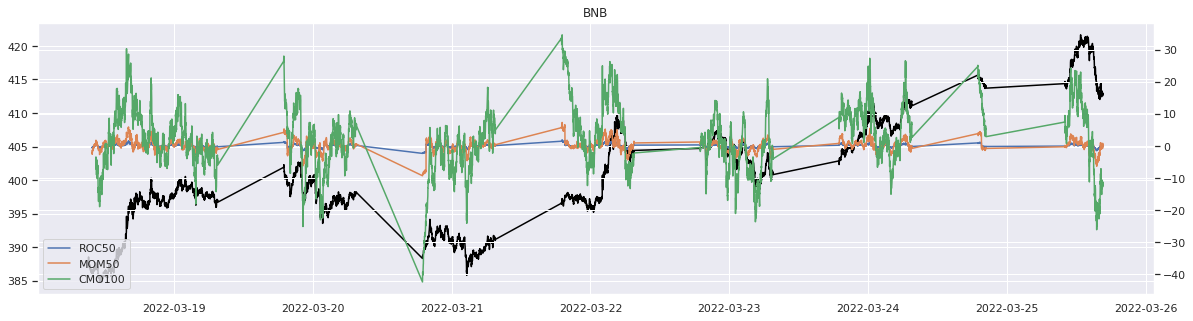

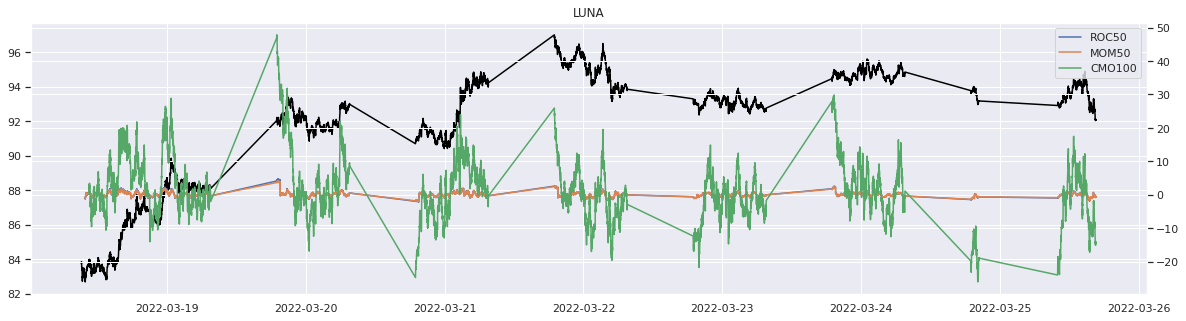

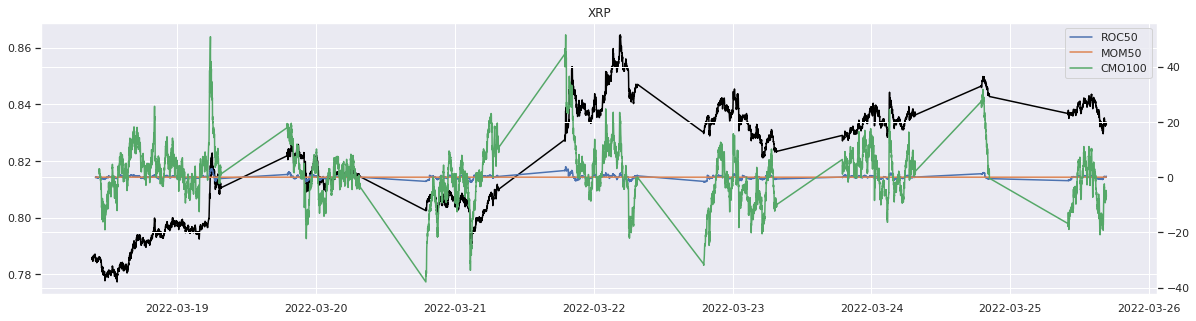

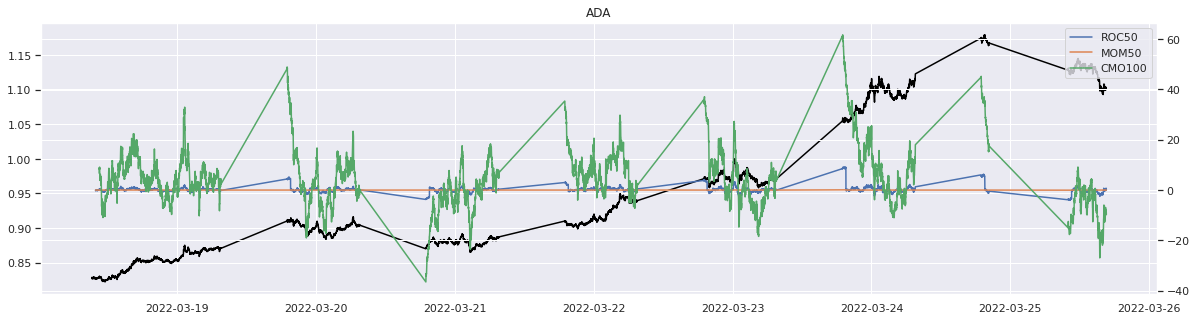

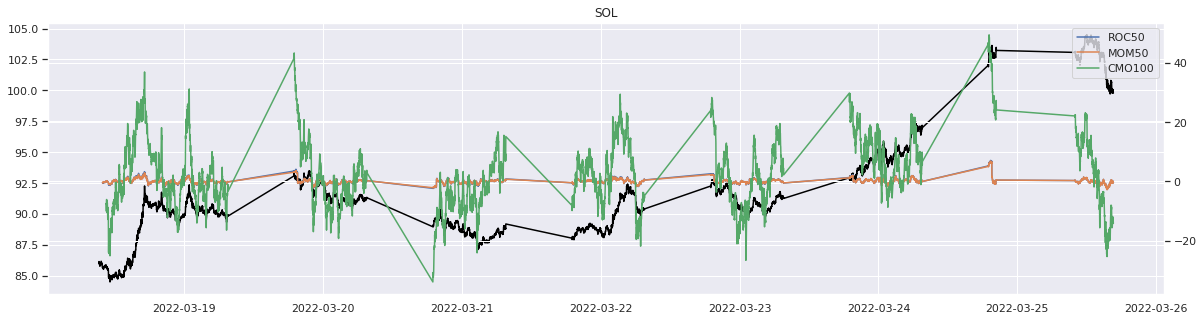

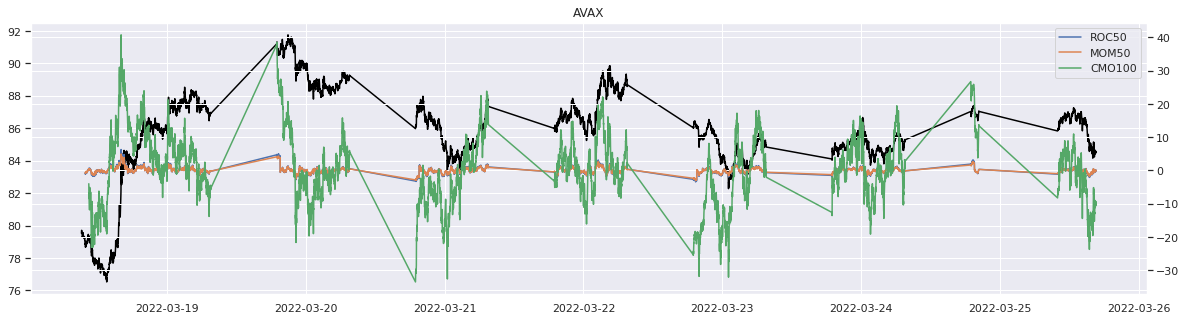

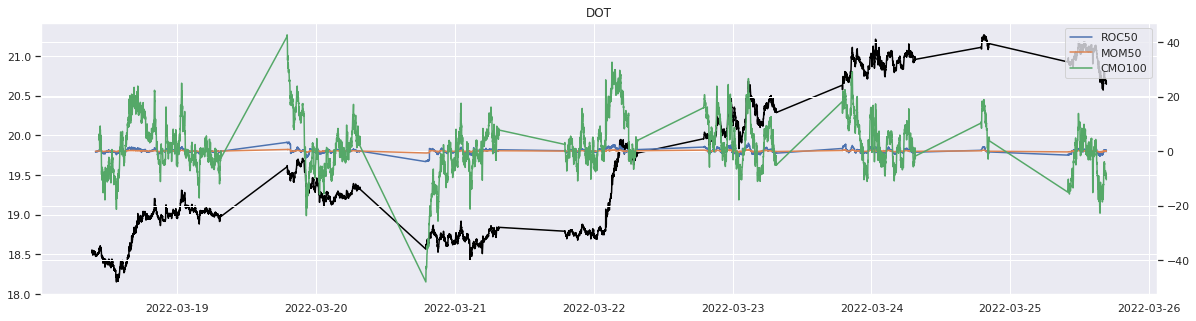

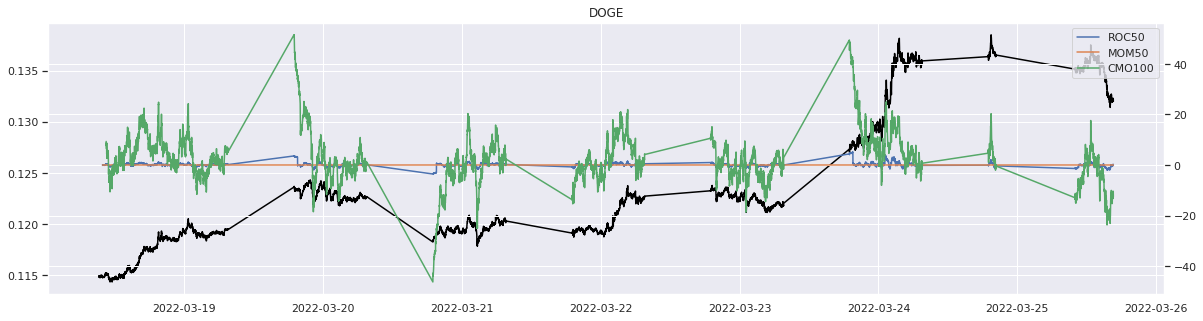

In [82]:
roc_cols = [col for col in df.columns if (("ROC" in col)&(len(col)<10))]
mom_cols = [col for col in df.columns if (("MOM" in col)&(len(col)<10))]
cmo_cols = [col for col in df.columns if (("CMO" in col)&(len(col)<10))]
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()
  for col in roc_cols + mom_cols + cmo_cols:
    plt.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, col], label=col)
  ax1.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, 'Price'], label='Price', color='black')
  plt.title(crypto_i)
  plt.legend()
  plt.show()

## 04_04 - Volatility Variables
Owner: Ángel https://github.com/PerezAng

### 04_04_01 - SHARPE Ratio
[Investopedia](https://www.investopedia.com/terms/s/sharperatio.asp#:~:text=The%20Sharpe%20ratio%20is%20calculated,of%20the%20portfolio's%20excess%20return.)


In [83]:
rf = 0 # risk free rate
N = 100

def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N - rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

In [84]:
# Create SHARPE
for crypto_i in crypto_list:
    filter_crypto_i = df['Crypto']==crypto_i
    # Sharpe
    df.loc[filter_crypto_i, 'Sharpe'] = (
        (df.loc[filter_crypto_i, 'Price'].pct_change().rolling(N, min_periods=1).mean() * N - rf) / 
        (df.loc[filter_crypto_i, 'Price'].pct_change().rolling(N, min_periods=1).std() * np.sqrt(N))
    )
        
df.tail()

Timestamp Crypto      Price        Vol24h      SMA10  \
74075 2022-03-25 16:37:30    ADA   1.100124  8.859713e+08   1.101739   
74076 2022-03-25 16:37:30    SOL  99.763381  9.357398e+08  99.942212   
74077 2022-03-25 16:37:30   AVAX  84.485016  4.549415e+08  84.545116   
74078 2022-03-25 16:37:30    DOT  20.643396  2.872487e+08  20.673562   
74079 2022-03-25 16:37:30   DOGE   0.131986  3.240196e+08   0.132130   

            SMA50      SMA100      EMA10       EMA50      EMA100  ...  \
74075    1.101752    1.102137   1.101513    1.102093    1.104837  ...   
74076  100.169612  100.294363  99.925390  100.150523  100.512418  ...   
74077   84.633846   84.731962  84.542377   84.642930   84.858727  ...   
74078   20.695807   20.707298  20.675866   20.700475   20.740867  ...   
74079    0.132178    0.132481   0.132142    0.132261    0.132679  ...   

          CMO100  ROCLowerThan0  ROCHigherThan0  MOMLowerThan0  \
74075  -9.786498              0               1              0   
74076 -14.181447              1               0              1   
74077 -10.411821              1               0              1   
74078 -10.534482              1               0              1   
74079 -12.528865              1               0              1   

       MOMHigherThan0  CMOHigherThan50  CMOLowerThan50  CMOLowerThan-50  \
74075               1                0               1                0   
74076               0                0               1                0   
74077               0                0               1                0   
74078               0                0               1                0   
74079               0                0               1                0   

       CMOHigherThan-50    Sharpe  
74075                 1 -0.664011  
74076                 1 -0.738664  
74077                 1 -0.589788  
74078                 1 -0.567066  
74079                 1 -0.994935  

[5 rows x 25 columns]

### 04_04_02 - Sortino Rate
[Investopedia](https://www.investopedia.com/terms/s/sortinoratio.asp)

In [85]:
def sortino_ratio(series, N,rf):
    mean = series.mean() * N -rf
    std_neg = series[series<0].std()*np.sqrt(N)
    return mean/std_neg

In [86]:
# Create SORTINO
for crypto_i in crypto_list:
    filter_crypto_i = df['Crypto']==crypto_i
    df.loc[filter_crypto_i, 'mean_sortino'] = (df.loc[filter_crypto_i, 'Price'].pct_change().rolling(N, min_periods=1).mean() * N - rf)
    df.loc[filter_crypto_i, 'std_neg'] = df.loc[filter_crypto_i, 'Price'].pct_change()
    df.loc[((filter_crypto_i)&(df['std_neg']>=0)), 'std_neg'] = np.NaN
    df.loc[filter_crypto_i, 'std_neg'] = df.loc[filter_crypto_i, 'std_neg'].rolling(N, min_periods=1).std() * np.sqrt(N)

# Sortino
df['Sortino'] = df['mean_sortino'] / df['std_neg']
df = df.drop(['mean_sortino', 'std_neg'], axis=1)
df.tail()

Timestamp Crypto      Price        Vol24h      SMA10  \
74075 2022-03-25 16:37:30    ADA   1.100124  8.859713e+08   1.101739   
74076 2022-03-25 16:37:30    SOL  99.763381  9.357398e+08  99.942212   
74077 2022-03-25 16:37:30   AVAX  84.485016  4.549415e+08  84.545116   
74078 2022-03-25 16:37:30    DOT  20.643396  2.872487e+08  20.673562   
74079 2022-03-25 16:37:30   DOGE   0.131986  3.240196e+08   0.132130   

            SMA50      SMA100      EMA10       EMA50      EMA100  ...  \
74075    1.101752    1.102137   1.101513    1.102093    1.104837  ...   
74076  100.169612  100.294363  99.925390  100.150523  100.512418  ...   
74077   84.633846   84.731962  84.542377   84.642930   84.858727  ...   
74078   20.695807   20.707298  20.675866   20.700475   20.740867  ...   
74079    0.132178    0.132481   0.132142    0.132261    0.132679  ...   

       ROCLowerThan0  ROCHigherThan0  MOMLowerThan0  MOMHigherThan0  \
74075              0               1              0               1   
74076              1               0              1               0   
74077              1               0              1               0   
74078              1               0              1               0   
74079              1               0              1               0   

       CMOHigherThan50  CMOLowerThan50  CMOLowerThan-50  CMOHigherThan-50  \
74075                0               1                0                 1   
74076                0               1                0                 1   
74077                0               1                0                 1   
74078                0               1                0                 1   
74079                0               1                0                 1   

         Sharpe   Sortino  
74075 -0.664011 -0.970704  
74076 -0.738664 -1.125509  
74077 -0.589788 -0.933343  
74078 -0.567066 -1.140441  
74079 -0.994935 -1.294532  

[5 rows x 26 columns]

### 04_04_03 - ATR & NATR
https://mrjbq7.github.io/ta-lib/func_groups/volatility_indicators.html

In [87]:
N = 100

for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i

  # NATR
  df.loc[filter_crypto_i, 'NATR'+str(N)] = talib.NATR(
      high = df.loc[filter_crypto_i, 'Price'].rolling(N, min_periods=1).max(), 
      low = df.loc[filter_crypto_i, 'Price'].rolling(N, min_periods=1).min(), 
      close = df.loc[filter_crypto_i, 'Price'], 
      timeperiod=N)
  
df.tail()

Timestamp Crypto      Price        Vol24h      SMA10  \
74075 2022-03-25 16:37:30    ADA   1.100124  8.859713e+08   1.101739   
74076 2022-03-25 16:37:30    SOL  99.763381  9.357398e+08  99.942212   
74077 2022-03-25 16:37:30   AVAX  84.485016  4.549415e+08  84.545116   
74078 2022-03-25 16:37:30    DOT  20.643396  2.872487e+08  20.673562   
74079 2022-03-25 16:37:30   DOGE   0.131986  3.240196e+08   0.132130   

            SMA50      SMA100      EMA10       EMA50      EMA100  ...  \
74075    1.101752    1.102137   1.101513    1.102093    1.104837  ...   
74076  100.169612  100.294363  99.925390  100.150523  100.512418  ...   
74077   84.633846   84.731962  84.542377   84.642930   84.858727  ...   
74078   20.695807   20.707298  20.675866   20.700475   20.740867  ...   
74079    0.132178    0.132481   0.132142    0.132261    0.132679  ...   

       ROCHigherThan0  MOMLowerThan0  MOMHigherThan0  CMOHigherThan50  \
74075               1              0               1                0   
74076               0              1               0                0   
74077               0              1               0                0   
74078               0              1               0                0   
74079               0              1               0                0   

       CMOLowerThan50  CMOLowerThan-50  CMOHigherThan-50    Sharpe   Sortino  \
74075               1                0                 1 -0.664011 -0.970704   
74076               1                0                 1 -0.738664 -1.125509   
74077               1                0                 1 -0.589788 -0.933343   
74078               1                0                 1 -0.567066 -1.140441   
74079               1                0                 1 -0.994935 -1.294532   

        NATR100  
74075  2.335427  
74076  2.350638  
74077  1.906378  
74078  1.719266  
74079  2.165670  

[5 rows x 27 columns]

### 04_04_04 - Plot

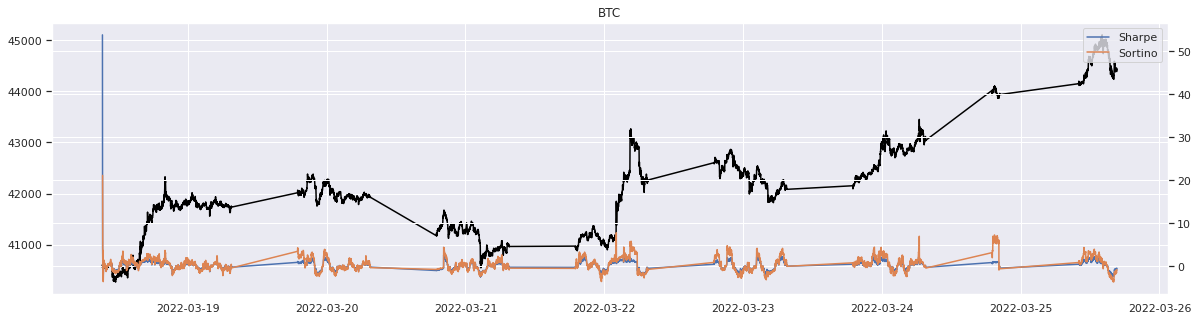

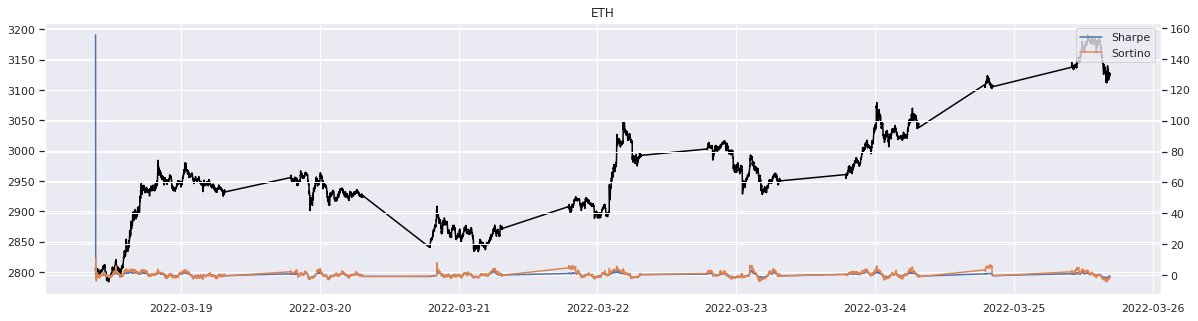

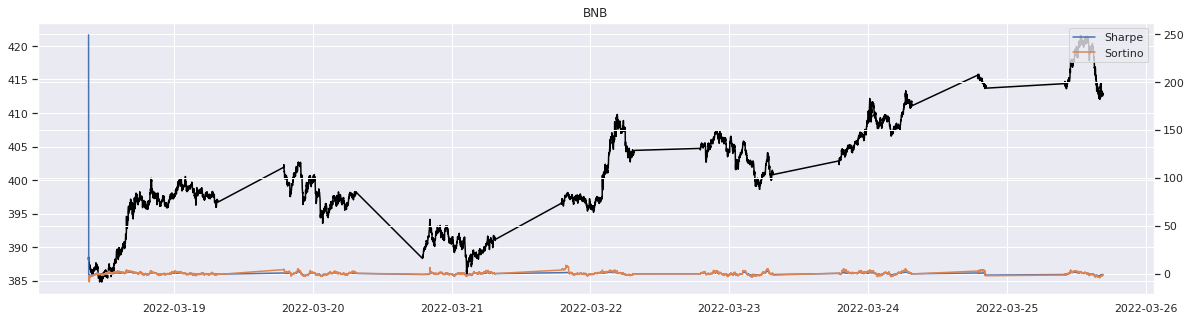

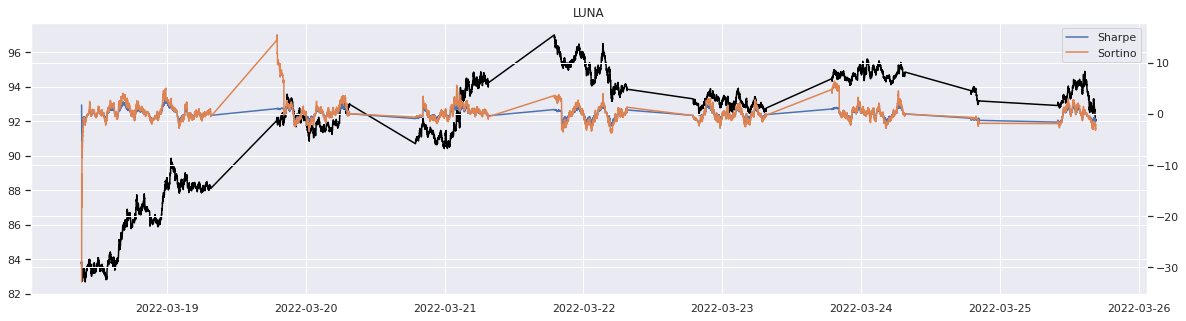

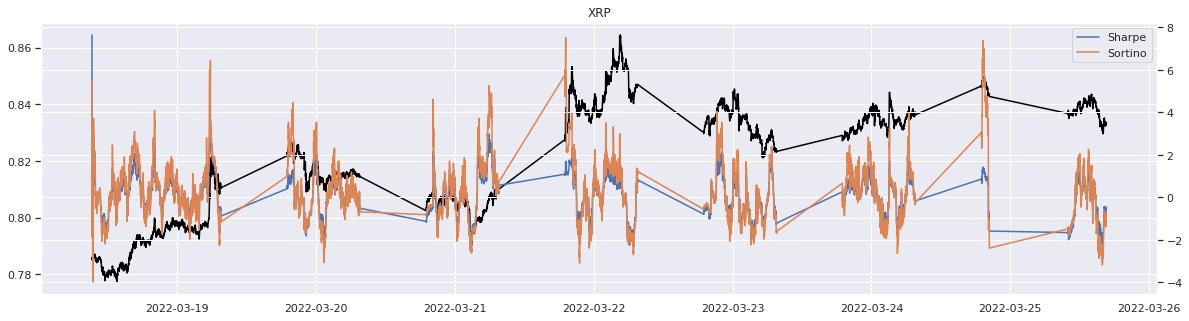

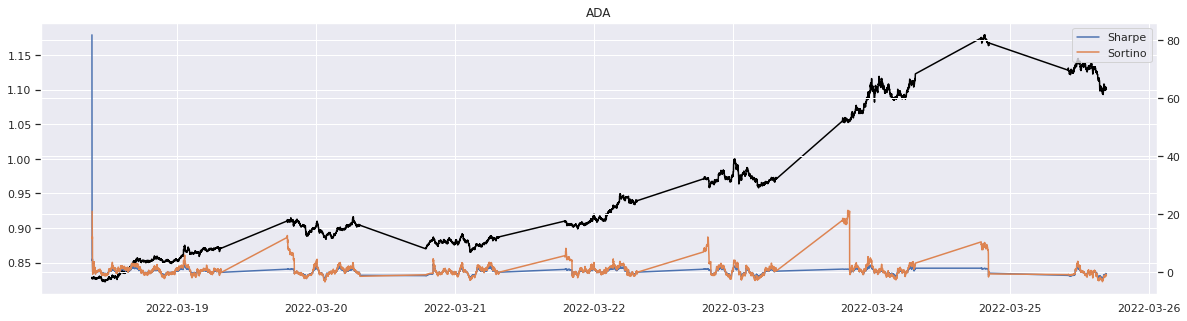

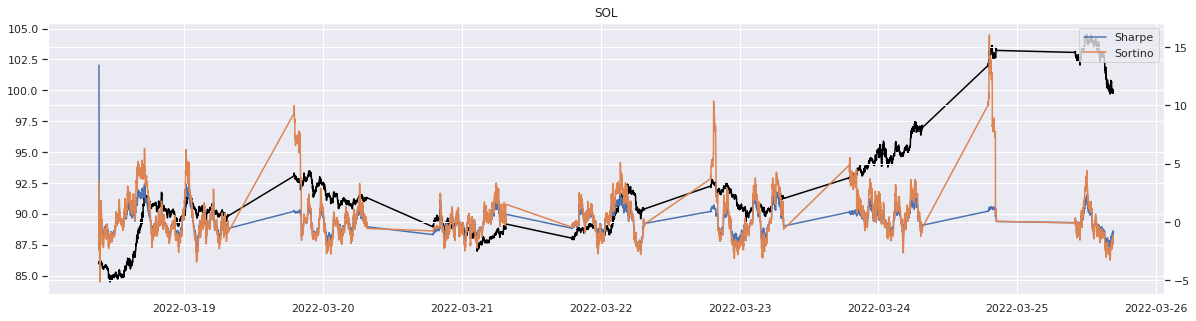

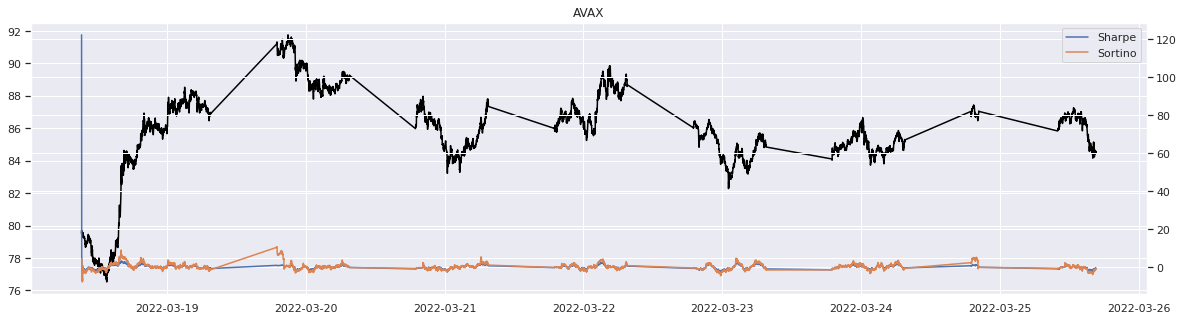

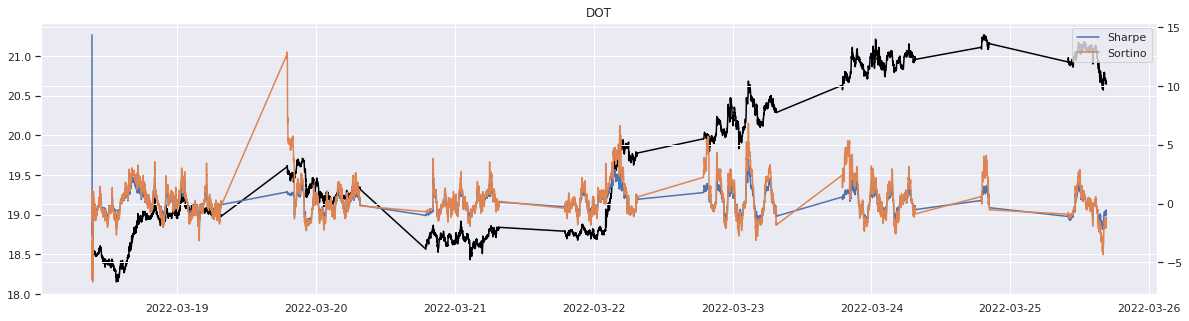

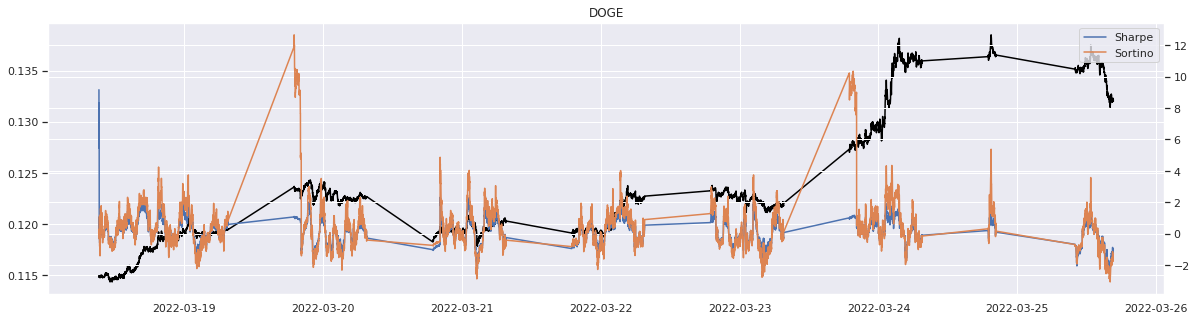

In [88]:
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()
  for col in ['Sharpe', 'Sortino']:
    plt.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, col], label=col)
  ax1.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, 'Price'], label='Price', color='black')
  plt.title(crypto_i)
  plt.legend()
  plt.show()

# 05 - Create Target

In [89]:
# Separation between rows = 45"

# Target horizon (how long from now we want the model to predict)
horizon_in_mins = 20  # in mins
horizon_rows = int(horizon_in_mins*60/45)
horizon_rows

26

## 05_01 Numerical Value

In [90]:
# Target precio
df['TARGET_num_'+str(horizon_rows)] = (df['Price'].shift(-horizon_rows*len(crypto_list))/df['Price'])
df

Timestamp Crypto         Price        Vol24h      SMA10  \
0     2022-03-18 09:12:00    BTC  40562.502806  3.649734e+09        NaN   
1     2022-03-18 09:12:00    ETH   2802.987669  3.595527e+09        NaN   
2     2022-03-18 09:12:00    BNB    388.140788  3.372194e+08        NaN   
3     2022-03-18 09:12:00   LUNA     83.733926  7.022888e+08        NaN   
4     2022-03-18 09:12:00    XRP      0.785357  3.444767e+08        NaN   
...                   ...    ...           ...           ...        ...   
74075 2022-03-25 16:37:30    ADA      1.100124  8.859713e+08   1.101739   
74076 2022-03-25 16:37:30    SOL     99.763381  9.357398e+08  99.942212   
74077 2022-03-25 16:37:30   AVAX     84.485016  4.549415e+08  84.545116   
74078 2022-03-25 16:37:30    DOT     20.643396  2.872487e+08  20.673562   
74079 2022-03-25 16:37:30   DOGE      0.131986  3.240196e+08   0.132130   

            SMA50      SMA100      EMA10       EMA50      EMA100  ...  \
0             NaN         NaN        NaN         NaN         NaN  ...   
1             NaN         NaN        NaN         NaN         NaN  ...   
2             NaN         NaN        NaN         NaN         NaN  ...   
3             NaN         NaN        NaN         NaN         NaN  ...   
4             NaN         NaN        NaN         NaN         NaN  ...   
...           ...         ...        ...         ...         ...  ...   
74075    1.101752    1.102137   1.101513    1.102093    1.104837  ...   
74076  100.169612  100.294363  99.925390  100.150523  100.512418  ...   
74077   84.633846   84.731962  84.542377   84.642930   84.858727  ...   
74078   20.695807   20.707298  20.675866   20.700475   20.740867  ...   
74079    0.132178    0.132481   0.132142    0.132261    0.132679  ...   

       MOMLowerThan0  MOMHigherThan0  CMOHigherThan50  CMOLowerThan50  \
0                  0               0                0               0   
1                  0               0                0               0   
2                  0               0                0               0   
3                  0               0                0               0   
4                  0               0                0               0   
...              ...             ...              ...             ...   
74075              0               1                0               1   
74076              1               0                0               1   
74077              1               0                0               1   
74078              1               0                0               1   
74079              1               0                0               1   

       CMOLowerThan-50  CMOHigherThan-50    Sharpe   Sortino   NATR100  \
0                    0                 0       NaN       NaN       NaN   
1                    0                 0       NaN       NaN       NaN   
2                    0                 0       NaN       NaN       NaN   
3                    0                 0       NaN       NaN       NaN   
4                    0                 0       NaN       NaN       NaN   
...                ...               ...       ...       ...       ...   
74075                0                 1 -0.664011 -0.970704  2.335427   
74076                0                 1 -0.738664 -1.125509  2.350638   
74077                0                 1 -0.589788 -0.933343  1.906378   
74078                0                 1 -0.567066 -1.140441  1.719266   
74079                0                 1 -0.994935 -1.294532  2.165670   

       TARGET_num_26  
0           1.000097  
1           1.000435  
2           0.996281  
3           0.996397  
4           1.001211  
...              ...  
74075            NaN  
74076            NaN  
74077            NaN  
74078            NaN  
74079            NaN  

[74080 rows x 28 columns]

## 05_02 Categorical Target

In [91]:
# Target up by 2%
df['TARGET_cat2_'+str(horizon_rows)] = ((df['Price'].shift(-horizon_rows*len(crypto_list))/df['Price']) > 1.02).astype(int)

# Target up by 1%
df['TARGET_cat1_'+str(horizon_rows)] = ((df['Price'].shift(-horizon_rows*len(crypto_list))/df['Price']) > 1.01).astype(int)

# Target up by 0.5%
df['TARGET_cat05_'+str(horizon_rows)] = ((df['Price'].shift(-horizon_rows*len(crypto_list))/df['Price']) > 1.005).astype(int)

# Target up
df['TARGET_cat0_'+str(horizon_rows)] = ((df['Price'].shift(-horizon_rows*len(crypto_list))/df['Price']) > 1).astype(int)

df

Timestamp Crypto         Price        Vol24h      SMA10  \
0     2022-03-18 09:12:00    BTC  40562.502806  3.649734e+09        NaN   
1     2022-03-18 09:12:00    ETH   2802.987669  3.595527e+09        NaN   
2     2022-03-18 09:12:00    BNB    388.140788  3.372194e+08        NaN   
3     2022-03-18 09:12:00   LUNA     83.733926  7.022888e+08        NaN   
4     2022-03-18 09:12:00    XRP      0.785357  3.444767e+08        NaN   
...                   ...    ...           ...           ...        ...   
74075 2022-03-25 16:37:30    ADA      1.100124  8.859713e+08   1.101739   
74076 2022-03-25 16:37:30    SOL     99.763381  9.357398e+08  99.942212   
74077 2022-03-25 16:37:30   AVAX     84.485016  4.549415e+08  84.545116   
74078 2022-03-25 16:37:30    DOT     20.643396  2.872487e+08  20.673562   
74079 2022-03-25 16:37:30   DOGE      0.131986  3.240196e+08   0.132130   

            SMA50      SMA100      EMA10       EMA50      EMA100  ...  \
0             NaN         NaN        NaN         NaN         NaN  ...   
1             NaN         NaN        NaN         NaN         NaN  ...   
2             NaN         NaN        NaN         NaN         NaN  ...   
3             NaN         NaN        NaN         NaN         NaN  ...   
4             NaN         NaN        NaN         NaN         NaN  ...   
...           ...         ...        ...         ...         ...  ...   
74075    1.101752    1.102137   1.101513    1.102093    1.104837  ...   
74076  100.169612  100.294363  99.925390  100.150523  100.512418  ...   
74077   84.633846   84.731962  84.542377   84.642930   84.858727  ...   
74078   20.695807   20.707298  20.675866   20.700475   20.740867  ...   
74079    0.132178    0.132481   0.132142    0.132261    0.132679  ...   

       CMOLowerThan-50  CMOHigherThan-50    Sharpe   Sortino   NATR100  \
0                    0                 0       NaN       NaN       NaN   
1                    0                 0       NaN       NaN       NaN   
2                    0                 0       NaN       NaN       NaN   
3                    0                 0       NaN       NaN       NaN   
4                    0                 0       NaN       NaN       NaN   
...                ...               ...       ...       ...       ...   
74075                0                 1 -0.664011 -0.970704  2.335427   
74076                0                 1 -0.738664 -1.125509  2.350638   
74077                0                 1 -0.589788 -0.933343  1.906378   
74078                0                 1 -0.567066 -1.140441  1.719266   
74079                0                 1 -0.994935 -1.294532  2.165670   

       TARGET_num_26  TARGET_cat2_26  TARGET_cat1_26  TARGET_cat05_26  \
0           1.000097               0               0                0   
1           1.000435               0               0                0   
2           0.996281               0               0                0   
3           0.996397               0               0                0   
4           1.001211               0               0                0   
...              ...             ...             ...              ...   
74075            NaN               0               0                0   
74076            NaN               0               0                0   
74077            NaN               0               0                0   
74078            NaN               0               0                0   
74079            NaN               0               0                0   

       TARGET_cat0_26  
0                   1  
1                   1  
2                   0  
3                   0  
4                   1  
...               ...  
74075               0  
74076               0  
74077               0  
74078               0  
74079               0  

[74080 rows x 32 columns]

In [92]:
cat_targets = [col for col in df.columns if "TARGET_cat" in col]
cat_targets

['TARGET_cat2_26', 'TARGET_cat1_26', 'TARGET_cat05_26', 'TARGET_cat0_26']

In [93]:
df[cat_targets].mean()

TARGET_cat2_26     0.007964
TARGET_cat1_26     0.028591
TARGET_cat05_26    0.109166
TARGET_cat0_26     0.530845
dtype: float64

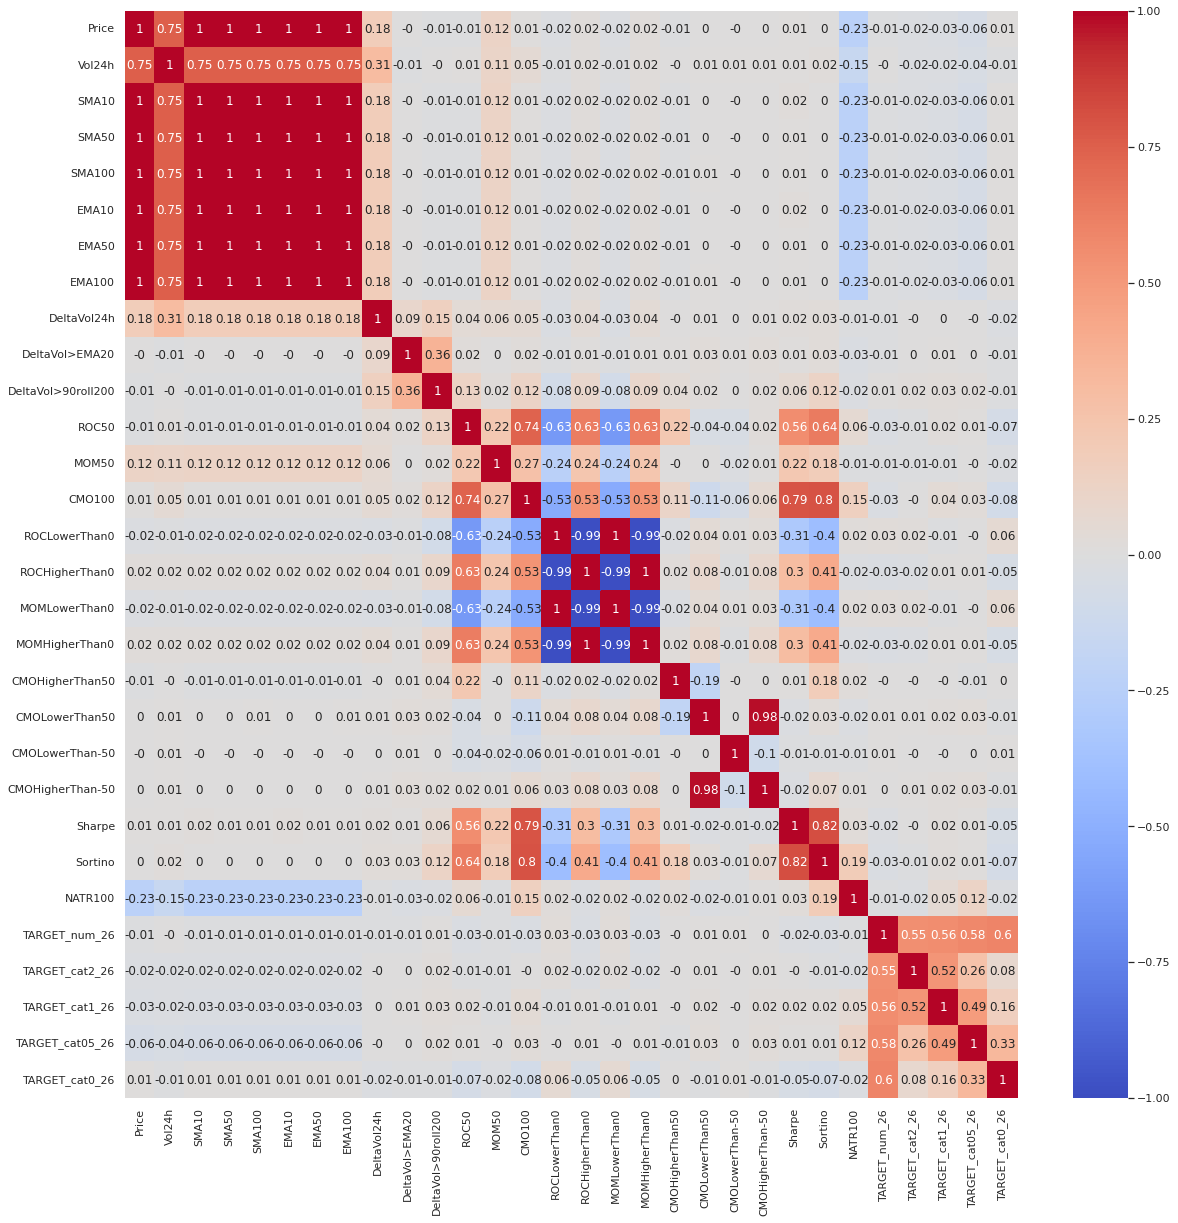

In [94]:
# Visualización coeficientes Pearson
plt.figure(figsize=(20,20))
sns.heatmap(np.round(df.corr(),2), 
            vmin=-1, vmax=1, 
            annot=True, cmap="coolwarm")
plt.show()

# 06 - Train model

## 06_01 - Process data

### 06_01_01 - Relativise variables
So that they are in a common scale.

In [95]:
df.tail(3)

Timestamp Crypto      Price        Vol24h      SMA10  \
74077 2022-03-25 16:37:30   AVAX  84.485016  4.549415e+08  84.545116   
74078 2022-03-25 16:37:30    DOT  20.643396  2.872487e+08  20.673562   
74079 2022-03-25 16:37:30   DOGE   0.131986  3.240196e+08   0.132130   

           SMA50     SMA100      EMA10      EMA50     EMA100  ...  \
74077  84.633846  84.731962  84.542377  84.642930  84.858727  ...   
74078  20.695807  20.707298  20.675866  20.700475  20.740867  ...   
74079   0.132178   0.132481   0.132142   0.132261   0.132679  ...   

       CMOLowerThan-50  CMOHigherThan-50    Sharpe   Sortino   NATR100  \
74077                0                 1 -0.589788 -0.933343  1.906378   
74078                0                 1 -0.567066 -1.140441  1.719266   
74079                0                 1 -0.994935 -1.294532  2.165670   

       TARGET_num_26  TARGET_cat2_26  TARGET_cat1_26  TARGET_cat05_26  \
74077            NaN               0               0                0   
74078            NaN               0               0                0   
74079            NaN               0               0                0   

       TARGET_cat0_26  
74077               0  
74078               0  
74079               0  

[3 rows x 32 columns]

In [96]:
df.columns

Index(['Timestamp', 'Crypto', 'Price', 'Vol24h', 'SMA10', 'SMA50', 'SMA100',
       'EMA10', 'EMA50', 'EMA100', 'DeltaVol24h', 'DeltaVol>EMA20',
       'DeltaVol>90roll200', 'ROC50', 'MOM50', 'CMO100', 'ROCLowerThan0',
       'ROCHigherThan0', 'MOMLowerThan0', 'MOMHigherThan0', 'CMOHigherThan50',
       'CMOLowerThan50', 'CMOLowerThan-50', 'CMOHigherThan-50', 'Sharpe',
       'Sortino', 'NATR100', 'TARGET_num_26', 'TARGET_cat2_26',
       'TARGET_cat1_26', 'TARGET_cat05_26', 'TARGET_cat0_26'],
      dtype='object')

In [97]:
cols_to_make_rel = ['SMA10', 'SMA50', 'SMA100', 'EMA10', 'EMA50', 'EMA100']
for col in cols_to_make_rel:
  df[col] = df[col]/df['Price']
df = df.dropna()
df

Timestamp Crypto         Price        Vol24h     SMA10  \
1000  2022-03-18 10:28:30    BTC  40627.877555  3.619456e+09  0.999461   
1001  2022-03-18 10:28:30    ETH   2807.884239  3.601225e+09  0.998885   
1002  2022-03-18 10:28:30    BNB    387.227125  3.444286e+08  0.999584   
1003  2022-03-18 10:28:30   LUNA     83.883935  7.483840e+08  0.997632   
1004  2022-03-18 10:28:30    XRP      0.785987  3.425028e+08  0.999317   
...                   ...    ...           ...           ...       ...   
73815 2022-03-25 16:18:00    ADA      1.105358  8.905082e+08  1.001070   
73816 2022-03-25 16:18:00    SOL    100.652740  9.574157e+08  1.000158   
73817 2022-03-25 16:18:00   AVAX     84.941957  4.586704e+08  1.001239   
73818 2022-03-25 16:18:00    DOT     20.781252  2.936871e+08  0.999578   
73819 2022-03-25 16:18:00   DOGE      0.132541  3.286035e+08  0.999982   

          SMA50    SMA100     EMA10     EMA50    EMA100  ...  CMOLowerThan-50  \
1000   0.998507  0.998475  0.999429  0.998829  0.998490  ...                0   
1001   0.997553  0.997719  0.998994  0.998040  0.997747  ...                0   
1002   0.998372  0.998828  0.999554  0.998876  0.998874  ...                0   
1003   0.994107  0.993336  0.998018  0.995342  0.993451  ...                0   
1004   0.998953  0.999481  0.999377  0.999179  0.999483  ...                0   
...         ...       ...       ...       ...       ...  ...              ...   
73815  0.995894  1.000800  1.000078  0.997975  1.001590  ...                0   
73816  0.996146  1.001281  0.999461  0.998162  1.002157  ...                0   
73817  0.997695  1.000638  1.000261  0.998873  1.001666  ...                0   
73818  0.995402  0.999128  0.999011  0.996999  0.999615  ...                0   
73819  0.998070  1.003931  0.999601  0.999548  1.003810  ...                0   

       CMOHigherThan-50    Sharpe   Sortino   NATR100  TARGET_num_26  \
1000                  1  0.478823  0.732234  0.250430       0.999728   
1001                  1  0.433243  0.697888  0.322718       1.001385   
1002                  1 -0.531277 -0.686580  0.565036       0.999116   
1003                  1  0.156085  0.201928  1.275947       0.997754   
1004                  1  0.175785  0.253016  0.295900       0.998472   
...                 ...       ...       ...       ...            ...   
73815                 1 -0.944282 -1.309658  2.343142       0.995265   
73816                 1 -1.276325 -1.999863  2.374720       0.991164   
73817                 1 -1.131720 -1.986920  1.953780       0.994621   
73818                 1 -0.762978 -1.585302  1.706636       0.993366   
73819                 1 -1.266280 -1.642490  2.093666       0.995814   

       TARGET_cat2_26  TARGET_cat1_26  TARGET_cat05_26  TARGET_cat0_26  
1000                0               0                0               0  
1001                0               0                0               1  
1002                0               0                0               0  
1003                0               0                0               0  
1004                0               0                0               0  
...               ...             ...              ...             ...  
73815               0               0                0               0  
73816               0               0                0               0  
73817               0               0                0               0  
73818               0               0                0               0  
73819               0               0                0               0  

[72820 rows x 32 columns]

### 06_01_02 - Delete incomplete data
Because our data is ingested for 12 hour, then on hold for 12 hour then ingested for 12 hours... The first values of an ingestion will lack of historic data to construct certain variables (moving average, etc.). This variables values won't ve valid so let's delete this rows.

In [102]:
# FIND timestamps after break periods
df_timestamps = pd.DataFrame({'Timestamps': df['Timestamp'].unique()})
df_timestamps['Delta'] = df_timestamps['Timestamps'] - df_timestamps['Timestamps'].shift(1)
df_timestamps['BigDelta'] = (df_timestamps['Delta'] > pd.Timedelta(5, 'min')).astype(int)
df_timestamps[df_timestamps['BigDelta']==1]

Timestamps           Delta  BigDelta
1670 2022-03-19 20:12:45 0 days 12:39:00         1
2570 2022-03-20 20:13:30 0 days 12:39:45         1
3469 2022-03-21 20:14:15 0 days 12:39:45         1
4369 2022-03-22 20:14:15 0 days 12:39:00         1
5268 2022-03-23 20:14:15 0 days 12:37:30         1
6168 2022-03-24 20:14:15 0 days 12:38:15         1
6182 2022-03-25 11:15:00 0 days 14:51:00         1

In [103]:
# Get timestamps after break periods (resuming timestamps) in a list
resuming_timestamps_list = sorted(df_timestamps.loc[df_timestamps['BigDelta']==1, "Timestamps"])
resuming_timestamps_list

[Timestamp('2022-03-19 20:12:45'),
 Timestamp('2022-03-20 20:13:30'),
 Timestamp('2022-03-21 20:14:15'),
 Timestamp('2022-03-22 20:14:15'),
 Timestamp('2022-03-23 20:14:15'),
 Timestamp('2022-03-24 20:14:15'),
 Timestamp('2022-03-25 11:15:00')]

In [104]:
# Delete 100 rows (per coin) after resuming the the ingestion
for ti in resuming_timestamps_list:
  tj = ti + pd.Timedelta(45, "sec")*100
  print("Deleting rows between", ti, "and", tj)
  
  # Keep only rows outiside ti - tj range
  filter_resuming_rows = ((df['Timestamp'] >= ti)&(df['Timestamp'] <= tj))
  print("Rows before deleting:", len(df))
  df = df[filter_resuming_rows==False]
  print("Rows after deleting:", len(df))
  print()

df = df.reset_index(drop=True)
df

Deleting rows between 2022-03-19 20:12:45 and 2022-03-19 21:27:45
Rows before deleting: 65820
Rows after deleting: 64820

Deleting rows between 2022-03-20 20:13:30 and 2022-03-20 21:28:30
Rows before deleting: 64820
Rows after deleting: 63820

Deleting rows between 2022-03-21 20:14:15 and 2022-03-21 21:29:15
Rows before deleting: 63820
Rows after deleting: 62820

Deleting rows between 2022-03-22 20:14:15 and 2022-03-22 21:29:15
Rows before deleting: 62820
Rows after deleting: 61820

Deleting rows between 2022-03-23 20:14:15 and 2022-03-23 21:29:15
Rows before deleting: 61820
Rows after deleting: 60820

Deleting rows between 2022-03-24 20:14:15 and 2022-03-24 21:29:15
Rows before deleting: 60820
Rows after deleting: 60680

Deleting rows between 2022-03-25 11:15:00 and 2022-03-25 12:30:00
Rows before deleting: 60680
Rows after deleting: 59680



Timestamp Crypto         Price        Vol24h     SMA10  \
0     2022-03-18 10:28:30    BTC  40627.877555  3.619456e+09  0.999461   
1     2022-03-18 10:28:30    ETH   2807.884239  3.601225e+09  0.998885   
2     2022-03-18 10:28:30    BNB    387.227125  3.444286e+08  0.999584   
3     2022-03-18 10:28:30   LUNA     83.883935  7.483840e+08  0.997632   
4     2022-03-18 10:28:30    XRP      0.785987  3.425028e+08  0.999317   
...                   ...    ...           ...           ...       ...   
59675 2022-03-25 16:18:00    ADA      1.105358  8.905082e+08  1.001070   
59676 2022-03-25 16:18:00    SOL    100.652740  9.574157e+08  1.000158   
59677 2022-03-25 16:18:00   AVAX     84.941957  4.586704e+08  1.001239   
59678 2022-03-25 16:18:00    DOT     20.781252  2.936871e+08  0.999578   
59679 2022-03-25 16:18:00   DOGE      0.132541  3.286035e+08  0.999982   

          SMA50    SMA100     EMA10     EMA50    EMA100  ...  CMOLowerThan-50  \
0      0.998507  0.998475  0.999429  0.998829  0.998490  ...                0   
1      0.997553  0.997719  0.998994  0.998040  0.997747  ...                0   
2      0.998372  0.998828  0.999554  0.998876  0.998874  ...                0   
3      0.994107  0.993336  0.998018  0.995342  0.993451  ...                0   
4      0.998953  0.999481  0.999377  0.999179  0.999483  ...                0   
...         ...       ...       ...       ...       ...  ...              ...   
59675  0.995894  1.000800  1.000078  0.997975  1.001590  ...                0   
59676  0.996146  1.001281  0.999461  0.998162  1.002157  ...                0   
59677  0.997695  1.000638  1.000261  0.998873  1.001666  ...                0   
59678  0.995402  0.999128  0.999011  0.996999  0.999615  ...                0   
59679  0.998070  1.003931  0.999601  0.999548  1.003810  ...                0   

       CMOHigherThan-50    Sharpe   Sortino   NATR100  TARGET_num_26  \
0                     1  0.478823  0.732234  0.250430       0.999728   
1                     1  0.433243  0.697888  0.322718       1.001385   
2                     1 -0.531277 -0.686580  0.565036       0.999116   
3                     1  0.156085  0.201928  1.275947       0.997754   
4                     1  0.175785  0.253016  0.295900       0.998472   
...                 ...       ...       ...       ...            ...   
59675                 1 -0.944282 -1.309658  2.343142       0.995265   
59676                 1 -1.276325 -1.999863  2.374720       0.991164   
59677                 1 -1.131720 -1.986920  1.953780       0.994621   
59678                 1 -0.762978 -1.585302  1.706636       0.993366   
59679                 1 -1.266280 -1.642490  2.093666       0.995814   

       TARGET_cat2_26  TARGET_cat1_26  TARGET_cat05_26  TARGET_cat0_26  
0                   0               0                0               0  
1                   0               0                0               1  
2                   0               0                0               0  
3                   0               0                0               0  
4                   0               0                0               0  
...               ...             ...              ...             ...  
59675               0               0                0               0  
59676               0               0                0               0  
59677               0               0                0               0  
59678               0               0                0               0  
59679               0               0                0               0  

[59680 rows x 32 columns]

## 06_02  -  Train - Test split

In [105]:
# TOTAL TIMESTAMPS
timestamps = df['Timestamp'].unique()
print(len(timestamps))

# Train - test split
index_to_split = int(0.7*len(timestamps))
timestamps_train = timestamps[:index_to_split]
print(len(timestamps_train))
timestamps_test = timestamps[index_to_split:]
print(len(timestamps_test))

5968
4177
1791


In [106]:
df.columns

Index(['Timestamp', 'Crypto', 'Price', 'Vol24h', 'SMA10', 'SMA50', 'SMA100',
       'EMA10', 'EMA50', 'EMA100', 'DeltaVol24h', 'DeltaVol>EMA20',
       'DeltaVol>90roll200', 'ROC50', 'MOM50', 'CMO100', 'ROCLowerThan0',
       'ROCHigherThan0', 'MOMLowerThan0', 'MOMHigherThan0', 'CMOHigherThan50',
       'CMOLowerThan50', 'CMOLowerThan-50', 'CMOHigherThan-50', 'Sharpe',
       'Sortino', 'NATR100', 'TARGET_num_26', 'TARGET_cat2_26',
       'TARGET_cat1_26', 'TARGET_cat05_26', 'TARGET_cat0_26'],
      dtype='object')

In [116]:
timestamp = ['Timestamp']
coins = ['Crypto']
original_cols = ['Price', 'Vol24h']
feat = ['SMA10', 'SMA50', 'SMA100', 'EMA10', 'EMA50', 'EMA100', 
        'DeltaVol24h', 'DeltaVol>EMA20', 'DeltaVol>90roll200', 
        'ROC50', 'MOM50', 'CMO100', 'ROCLowerThan0',
        'ROCHigherThan0', 'MOMLowerThan0', 'MOMHigherThan0', 'CMOHigherThan50',
        'CMOLowerThan50', 'CMOLowerThan-50', 'CMOHigherThan-50', 'Sharpe', 
        'Sortino', 'NATR100']
targets = ['TARGET_num_'+str(horizon_rows), 'TARGET_cat2_'+str(horizon_rows), 'TARGET_cat1_'+str(horizon_rows), 'TARGET_cat05_'+str(horizon_rows), 'TARGET_cat0_'+str(horizon_rows)]

df_train = df.loc[df['Timestamp'].isin(timestamps_train), timestamp + coins + feat + targets]
df_test = df.loc[df['Timestamp'].isin(timestamps_test), timestamp + coins + feat + targets]

In [108]:
df_train.head(2)

Timestamp Crypto     SMA10     SMA50    SMA100     EMA10  \
0 2022-03-18 10:28:30    BTC  0.999461  0.998507  0.998475  0.999429   
1 2022-03-18 10:28:30    ETH  0.998885  0.997553  0.997719  0.998994   

      EMA50    EMA100   DeltaVol24h  DeltaVol>EMA20  ...  CMOLowerThan-50  \
0  0.998829  0.998490  1.049808e+06             0.0  ...                0   
1  0.998040  0.997747  1.458323e+06             0.0  ...                0   

   CMOHigherThan-50    Sharpe   Sortino   NATR100  TARGET_num_26  \
0                 1  0.478823  0.732234  0.250430       0.999728   
1                 1  0.433243  0.697888  0.322718       1.001385   

   TARGET_cat2_26  TARGET_cat1_26  TARGET_cat05_26  TARGET_cat0_26  
0               0               0                0               0  
1               0               0                0               1  

[2 rows x 30 columns]

In [109]:
df_test.head(2)

Timestamp Crypto     SMA10     SMA50    SMA100     EMA10  \
41770 2022-03-22 22:52:30    BTC  0.999391  1.000582  1.002980  0.999444   
41771 2022-03-22 22:52:30    ETH  0.999270  1.000744  1.002333  0.999366   

          EMA50    EMA100   DeltaVol24h  DeltaVol>EMA20  ...  CMOLowerThan-50  \
41770  1.000662  1.001606  2.304743e+06             1.0  ...                0   
41771  1.000527  1.001350  1.757326e+06             0.0  ...                0   

       CMOHigherThan-50    Sharpe   Sortino   NATR100  TARGET_num_26  \
41770                 1 -0.960459 -1.409812  0.925712       0.998676   
41771                 1 -0.878141 -1.254535  0.679396       0.999547   

       TARGET_cat2_26  TARGET_cat1_26  TARGET_cat05_26  TARGET_cat0_26  
41770               0               0                0               0  
41771               0               0                0               0  

[2 rows x 30 columns]

In [110]:
len(df_train), len(df_test)

(41770, 17910)

## 06_03 - Train Model

In [111]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [112]:
target = 'TARGET_cat0_26'

arbol_ejemplo = tree.DecisionTreeClassifier(max_depth = 15, min_samples_split=10)
arbol_ejemplo.fit(df_train[feat], df_train[target])

DecisionTreeClassifier(max_depth=15, min_samples_split=10)

Train: 


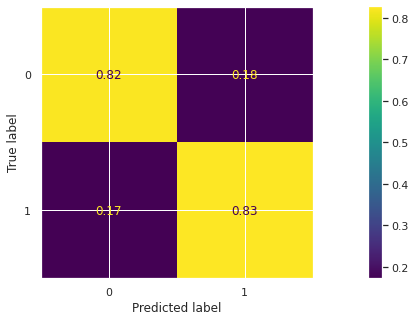

Test: 


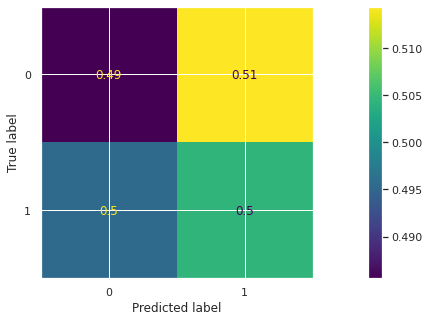

In [113]:
y_train_predict = arbol_ejemplo.predict(df_train[feat])
y_test_predict = arbol_ejemplo.predict(df_test[feat])

print("Train: ") 
ConfusionMatrixDisplay(confusion_matrix(df_train[target], 
                                        y_train_predict, 
                                        normalize='true')).plot()
plt.show()

print("Test: ")
ConfusionMatrixDisplay(confusion_matrix(df_test[target], 
                                        y_test_predict, 
                                        normalize='true')).plot()
plt.show()

# 07 - Validate Strategy

Vamos a crear un entorno similar al de producción, para que la estrategia que desarrollemos aquí luego podamos copiarla y pegarla en el entorno de puesta en producción en Quix.

In [119]:
# Qué pinta tienen los datos en producción?
# Iteramos sobre 5 timestamps del test
for ti in timestamps_test[:5]:
  # Datos tal cual los tendremos en producción (sólo una fila)
  df_i = df.loc[df['Timestamp']==(ti), timestamp + coins + original_cols + feat].reset_index(drop=True)
  print("Time", ti)
  display(df_i)
  print()

Time 2022-03-22T22:52:30.000000000


Timestamp Crypto         Price        Vol24h     SMA10     SMA50  \
0 2022-03-22 22:52:30    BTC  42565.473981  6.528814e+09  0.999391  1.000582   
1 2022-03-22 22:52:30    ETH   3000.804813  4.538241e+09  0.999270  1.000744   
2 2022-03-22 22:52:30    BNB    406.389511  4.224724e+08  0.999367  0.999994   
3 2022-03-22 22:52:30   LUNA     93.319392  7.333457e+08  0.999129  1.000947   
4 2022-03-22 22:52:30    XRP      0.839345  5.053028e+08  0.999521  1.000784   
5 2022-03-22 22:52:30    ADA      0.973028  5.132791e+08  0.998988  1.004563   
6 2022-03-22 22:52:30    SOL     91.519698  6.370205e+08  0.999546  1.001897   
7 2022-03-22 22:52:30   AVAX     85.542169  6.576641e+08  0.999860  1.001977   
8 2022-03-22 22:52:30    DOT     20.021387  3.544235e+08  0.998925  1.000279   
9 2022-03-22 22:52:30   DOGE      0.122824  1.915293e+08  0.999492  0.999162   

     SMA100     EMA10     EMA50    EMA100  ...  ROCHigherThan0  MOMLowerThan0  \
0  1.002980  0.999444  1.000662  1.001606  ...               0              1   
1  1.002333  0.999366  1.000527  1.001350  ...               0              1   
2  1.000491  0.999411  0.999819  0.999884  ...               1              0   
3  1.001895  0.999159  1.000462  1.000838  ...               0              1   
4  1.001254  0.999586  1.000435  1.000311  ...               0              1   
5  1.005345  0.999383  1.002744  1.002977  ...               0              1   
6  1.004761  0.999585  1.001636  1.003218  ...               0              1   
7  1.004968  0.999834  1.001875  1.003159  ...               0              1   
8  1.002675  0.999018  1.000240  1.001252  ...               0              1   
9  1.001267  0.999490  0.999617  1.000470  ...               1              0   

   MOMHigherThan0  CMOHigherThan50  CMOLowerThan50  CMOLowerThan-50  \
0               0                0               1                0   
1               0                0               1                0   
2               1                0               1                0   
3               0                0               1                0   
4               0                0               1                0   
5               0                0               1                0   
6               0                0               1                0   
7               0                0               1                0   
8               0                0               1                0   
9               1                0               1                0   

   CMOHigherThan-50    Sharpe   Sortino   NATR100  
0                 1 -0.960459 -1.409812  0.925712  
1                 1 -0.878141 -1.254535  0.679396  
2                 1 -0.293356 -0.478161  0.598671  
3                 1 -0.556186 -0.884168  0.944968  
4                 1 -0.131923 -0.193155  0.926052  
5                 1 -0.355766 -0.520932  1.735879  
6                 1 -1.123117 -1.809449  1.182801  
7                 1 -0.906086 -1.318055  1.512558  
8                 1 -1.160620 -1.587830  1.381127  
9                 1 -0.790379 -1.185429  0.910130  

[10 rows x 27 columns]


Time 2022-03-22T22:53:15.000000000


Timestamp Crypto         Price        Vol24h     SMA10     SMA50  \
0 2022-03-22 22:53:15    BTC  42530.376054  6.524289e+09  1.000242  1.001377   
1 2022-03-22 22:53:15    ETH   2999.064047  4.536603e+09  0.999956  1.001304   
2 2022-03-22 22:53:15    BNB    406.118168  4.224021e+08  1.000106  1.000674   
3 2022-03-22 22:53:15   LUNA     93.271778  7.330770e+08  0.999694  1.001427   
4 2022-03-22 22:53:15    XRP      0.839024  5.052105e+08  1.000047  1.001129   
5 2022-03-22 22:53:15    ADA      0.971707  5.128181e+08  1.000471  1.005726   
6 2022-03-22 22:53:15    SOL     91.461981  6.368037e+08  1.000168  1.002459   
7 2022-03-22 22:53:15   AVAX     85.450163  6.571066e+08  1.000846  1.002985   
8 2022-03-22 22:53:15    DOT     20.021380  3.544258e+08  0.999066  1.000297   
9 2022-03-22 22:53:15   DOGE      0.122688  1.913743e+08  1.000649  1.000291   

     SMA100     EMA10     EMA50    EMA100  ...  ROCHigherThan0  MOMLowerThan0  \
0  1.003744  1.000220  1.001430  1.002384  ...               0              1   
1  1.002869  0.999956  1.001065  1.001893  ...               0              1   
2  1.001137  1.000065  1.000468  1.000541  ...               1              0   
3  1.002364  0.999730  1.000935  1.001322  ...               0              1   
4  1.001626  0.999974  1.000785  1.000679  ...               0              1   
5  1.006662  1.000606  1.003946  1.004254  ...               0              1   
6  1.005311  1.000177  1.002180  1.003775  ...               0              1   
7  1.005958  1.000745  1.002838  1.004156  ...               0              1   
8  1.002587  0.999197  1.000231  1.001228  ...               1              0   
9  1.002308  1.000487  1.000694  1.001545  ...               1              0   

   MOMHigherThan0  CMOHigherThan50  CMOLowerThan50  CMOLowerThan-50  \
0               0                0               1                0   
1               0                0               1                0   
2               1                0               1                0   
3               0                0               1                0   
4               0                0               1                0   
5               0                0               1                0   
6               0                0               1                0   
7               0                0               1                0   
8               1                0               1                0   
9               1                0               1                0   

   CMOHigherThan-50    Sharpe   Sortino   NATR100  
0                 1 -1.118829 -1.661117  0.925888  
1                 1 -1.026142 -1.484633  0.680359  
2                 1 -0.525947 -0.857966  0.597655  
3                 1 -0.692147 -1.111984  0.943609  
4                 1 -0.190621 -0.282008  0.922752  
5                 1 -0.450238 -0.662500  1.734751  
6                 1 -1.207051 -1.984146  1.183979  
7                 1 -1.153257 -1.684113  1.512494  
8                 1 -1.208475 -1.646495  1.378603  
9                 1 -0.889746 -1.334427  0.911555  

[10 rows x 27 columns]


Time 2022-03-22T22:54:00.000000000


Timestamp Crypto         Price        Vol24h     SMA10     SMA50  \
0 2022-03-22 22:54:00    BTC  42521.057024  6.523871e+09  1.000429  1.001585   
1 2022-03-22 22:54:00    ETH   2997.880391  4.535454e+09  1.000318  1.001678   
2 2022-03-22 22:54:00    BNB    405.991106  4.223637e+08  1.000380  1.001000   
3 2022-03-22 22:54:00   LUNA     93.223900  7.327665e+08  1.000152  1.001904   
4 2022-03-22 22:54:00    XRP      0.838385  5.049967e+08  1.000771  1.001872   
5 2022-03-22 22:54:00    ADA      0.971571  5.128584e+08  1.000556  1.005686   
6 2022-03-22 22:54:00    SOL     91.434105  6.368032e+08  1.000384  1.002706   
7 2022-03-22 22:54:00   AVAX     85.431347  6.571393e+08  1.000852  1.003141   
8 2022-03-22 22:54:00    DOT     19.992939  3.540659e+08  1.000482  1.001697   
9 2022-03-22 22:54:00   DOGE      0.122729  1.914468e+08  1.000279  0.999985   

     SMA100     EMA10     EMA50    EMA100  ...  ROCHigherThan0  MOMLowerThan0  \
0  1.003899  1.000360  1.001585  1.002553  ...               0              1   
1  1.003216  1.000287  1.001403  1.002244  ...               0              1   
2  1.001426  1.000309  1.000751  1.000837  ...               1              0   
3  1.002832  1.000199  1.001392  1.001800  ...               0              1   
4  1.002369  1.000602  1.001487  1.001414  ...               0              1   
5  1.006748  1.000611  1.003927  1.004308  ...               0              1   
6  1.005529  1.000394  1.002388  1.004000  ...               0              1   
7  1.006072  1.000790  1.002939  1.004290  ...               0              1   
8  1.003915  1.000506  1.001589  1.002599  ...               0              1   
9  1.001906  1.000125  1.000346  1.001186  ...               1              0   

   MOMHigherThan0  CMOHigherThan50  CMOLowerThan50  CMOLowerThan-50  \
0               0                0               1                0   
1               0                0               1                0   
2               1                0               1                0   
3               0                0               1                0   
4               0                0               1                0   
5               0                0               1                0   
6               0                0               1                0   
7               0                0               1                0   
8               0                0               1                0   
9               1                0               1                0   

   CMOHigherThan-50    Sharpe   Sortino   NATR100  
0                 1 -1.155438 -1.735845  0.925509  
1                 1 -1.089429 -1.594735  0.681191  
2                 1 -0.578411 -0.953129  0.596439  
3                 1 -0.740281 -1.198132  0.942269  
4                 1 -0.369296 -0.551252  0.919836  
5                 1 -0.498953 -0.735445  1.731541  
6                 1 -1.278763 -2.112010  1.184768  
7                 1 -1.377057 -1.983512  1.511150  
8                 1 -1.338528 -1.815656  1.378062  
9                 1 -0.888957 -1.333298  0.911665  

[10 rows x 27 columns]


Time 2022-03-22T22:54:45.000000000


Timestamp Crypto         Price        Vol24h     SMA10     SMA50  \
0 2022-03-22 22:54:45    BTC  42526.994210  6.525899e+09  1.000261  1.001448   
1 2022-03-22 22:54:45    ETH   2998.287090  4.537067e+09  1.000164  1.001532   
2 2022-03-22 22:54:45    BNB    406.075492  4.225270e+08  1.000126  1.000821   
3 2022-03-22 22:54:45   LUNA     93.212582  7.327216e+08  1.000199  1.002004   
4 2022-03-22 22:54:45    XRP      0.838634  5.052042e+08  1.000421  1.001582   
5 2022-03-22 22:54:45    ADA      0.972079  5.132399e+08  1.000055  1.005038   
6 2022-03-22 22:54:45    SOL     91.468528  6.378499e+08  0.999989  1.002288   
7 2022-03-22 22:54:45   AVAX     85.455616  6.575472e+08  1.000454  1.002807   
8 2022-03-22 22:54:45    DOT     19.994039  3.542115e+08  1.000412  1.001638   
9 2022-03-22 22:54:45   DOGE      0.122800  1.914853e+08  0.999751  0.999449   

     SMA100     EMA10     EMA50    EMA100  ...  ROCHigherThan0  MOMLowerThan0  \
0  1.003694  1.000180  1.001388  1.002365  ...               1              0   
1  1.003032  1.000124  1.001217  1.002066  ...               0              1   
2  1.001194  1.000083  1.000522  1.000617  ...               1              0   
3  1.002905  1.000262  1.001454  1.001884  ...               0              1   
4  1.002050  1.000250  1.001144  1.001095  ...               1              0   
5  1.006147  1.000072  1.003269  1.003709  ...               0              1   
6  1.005062  1.000014  1.001932  1.003551  ...               0              1   
7  1.005674  1.000414  1.002550  1.003926  ...               0              1   
8  1.003757  1.000369  1.001473  1.002494  ...               0              1   
9  1.001272  0.999629  0.999776  1.000595  ...               1              0   

   MOMHigherThan0  CMOHigherThan50  CMOLowerThan50  CMOLowerThan-50  \
0               1                0               1                0   
1               0                0               1                0   
2               1                0               1                0   
3               0                0               1                0   
4               1                0               1                0   
5               0                0               1                0   
6               0                0               1                0   
7               0                0               1                0   
8               0                0               1                0   
9               1                0               1                0   

   CMOHigherThan-50    Sharpe   Sortino   NATR100  
0                 1 -1.137810 -1.710179  0.924803  
1                 1 -1.061545 -1.555084  0.681656  
2                 1 -0.586507 -0.966015  0.594926  
3                 1 -0.783000 -1.268220  0.940577  
4                 1 -0.375866 -0.560843  0.915982  
5                 1 -0.697611 -1.000950  1.727220  
6                 1 -1.285361 -2.121992  1.184745  
7                 1 -1.438003 -2.062355  1.509062  
8                 1 -1.386812 -1.877356  1.375386  
9                 1 -0.740489 -1.102166  0.911547  

[10 rows x 27 columns]


Time 2022-03-22T22:55:30.000000000


Timestamp Crypto         Price        Vol24h     SMA10     SMA50  \
0 2022-03-22 22:55:30    BTC  42524.264926  6.525948e+09  1.000280  1.001511   
1 2022-03-22 22:55:30    ETH   2998.192262  4.537301e+09  1.000179  1.001547   
2 2022-03-22 22:55:30    BNB    406.042057  4.225151e+08  1.000172  1.000919   
3 2022-03-22 22:55:30   LUNA     93.183509  7.325424e+08  1.000435  1.002262   
4 2022-03-22 22:55:30    XRP      0.838415  5.053816e+08  1.000600  1.001837   
5 2022-03-22 22:55:30    ADA      0.971481  5.130234e+08  1.000592  1.005490   
6 2022-03-22 22:55:30    SOL     91.465548  6.379247e+08  1.000032  1.002275   
7 2022-03-22 22:55:30   AVAX     85.509451  6.581897e+08  0.999850  1.002120   
8 2022-03-22 22:55:30    DOT     20.034234  3.555371e+08  0.998557  0.999654   
9 2022-03-22 22:55:30   DOGE      0.122679  1.913795e+08  1.000675  1.000446   

     SMA100     EMA10     EMA50    EMA100  ...  ROCHigherThan0  MOMLowerThan0  \
0  1.003693  1.000200  1.001395  1.002381  ...               0              1   
1  1.003016  1.000127  1.001200  1.002056  ...               0              1   
2  1.001251  1.000135  1.000580  1.000686  ...               1              0   
3  1.003166  1.000470  1.001698  1.002153  ...               0              1   
4  1.002288  1.000418  1.001350  1.001329  ...               0              1   
5  1.006688  1.000562  1.003733  1.004240  ...               0              1   
6  1.004999  1.000039  1.001887  1.003512  ...               0              1   
7  1.004932  0.999823  1.001844  1.003228  ...               0              1   
8  1.001667  0.998660  0.999485  1.000473  ...               1              0   
9  1.002183  1.000505  1.000734  1.001552  ...               1              0   

   MOMHigherThan0  CMOHigherThan50  CMOLowerThan50  CMOLowerThan-50  \
0               0                0               1                0   
1               0                0               1                0   
2               1                0               1                0   
3               0                0               1                0   
4               0                0               1                0   
5               0                0               1                0   
6               0                0               1                0   
7               0                0               1                0   
8               1                0               1                0   
9               1                0               1                0   

   CMOHigherThan-50    Sharpe   Sortino   NATR100  
0                 1 -1.160169 -1.737654  0.924292  
1                 1 -1.055406 -1.542967  0.682230  
2                 1 -0.593158 -0.979064  0.593600  
3                 1 -0.845047 -1.379955  0.939082  
4                 1 -0.421311 -0.635372  0.912673  
5                 1 -0.730144 -1.053148  1.724898  
6                 1 -1.380833 -2.253041  1.185202  
7                 1 -1.384265 -1.992236  1.506470  
8                 1 -1.001529 -1.395361  1.370057  
9                 1 -1.054416 -1.560357  0.912604  

[10 rows x 27 columns]

In [152]:
def my_buying_strategy(df_i, my_USD):
  """
  Design an strategy that decides when to start a purchase depending on 
  the lastest data available
  """

  # Aquí ponemos la lógica para comprar o no
  # Por ejemplo, yo voy a usar el modelo entrenado como ejemplo en el punto 6
  my_model = arbol_ejemplo
  my_model_columns = feat
  df_i['score'] = [score[1] for score in my_model.predict_proba(df_i[feat])]
  df_i = df_i.sort_values('score', ascending=False)
  coin_i = df_i['Crypto'].iloc[0]

  # Y aquí vamos a decidir la señal de compra, que podrían ser las variables de Salva
  purchase_condition = df_i['score'].iloc[0] > 0.1

  # Si se cumple la condición de compra, efectuar la compra
  if purchase_condition == True:
    purchase = {"Time": df_i['Timestamp'].iloc[0], 
                "Coin": coin_i, 
                "USD": my_USD,
                "Data": df_i, 
                "Exit": False}
  else:
    # Si no se da la condición de compra devolver la compra como vacía
    purchase = {}

  return purchase

In [153]:
def my_selling_strategy(df_i, purchase):
  """
  Design an strategy that decides when to start a sell depending on 
  the lastest data available and the purchase info
  """

  # Actualizamos los datos de la compra (cómo va). Ahora solo me interesa la moneda que he comprado
  df_i_coin_i = df_i[df_i['Crypto']==purchase["Coin"]]
  purchase["Data"] = purchase["Data"].append(df_i_coin_i).reset_index(drop=True) # Aquí tenemos todas las variables, por lo que podemos usarlas para la lógica de salida

  # Aquí ponemos la lógica para vender. En mi caso muy sencilla
  precio_compra = purchase["Data"]["Price"].iloc[0]
  precio_actual = purchase["Data"]["Price"].iloc[-1]
  tiempo_desde_compra = purchase["Data"]["Timestamp"].iloc[-1] - purchase["Data"]["Timestamp"].iloc[0]
  
  # Si ha subido un 0.5% me salgo muy contento
  if precio_actual/precio_compra >= 1.005:
    purchase["Exit"] = True
  
  # Si ha bajado un 0.25% me enfado y me salgo
  if precio_actual/precio_compra <= 0.9975:
    purchase["Exit"] = True

  # Si ha pasado más de 10 mins me aburro y me voy
  if tiempo_desde_compra > pd.Timedelta(10, "min"):
    purchase["Exit"] = True

  #Si se cumple una condición de salida, ejecutar la venta
  if purchase["Exit"] == True:
    purchase['Price_in'] = precio_compra
    purchase['Price_out'] = precio_actual
    purchase['USD_out'] = purchase['USD']*precio_actual/precio_compra
    purchase['Time_out'] = purchase["Data"]["Timestamp"].iloc[-1]
    purchase['Duration'] = tiempo_desde_compra

  return purchase

In [164]:
def actualizar_df_operaciones(df_operaciones, purchase):
  df_operacion_i = pd.DataFrame({
      "Time_in":[purchase['Time']], 
      "Time_out":[purchase['Time_out']], 
      "Duration":[purchase['Duration']], 
      "Price_in":[purchase['Price_in']], 
      "Price_out":[purchase['Price_out']], 
      "Coin":[purchase['Coin']], 
      "My_USD_in":[purchase['USD']], 
      "My_USD_out":[purchase['USD_out']]})
  

  return df_operaciones.append(df_operacion_i)

In [166]:
my_USD = 1000
df_operaciones = pd.DataFrame()
purchase = {}

for ti in timestamps_test:
  
  # Datos tal cual los tendremos en producción (sólo una fila)
  df_i = df.loc[df['Timestamp']==(ti), timestamp + coins + original_cols + feat].reset_index(drop=True)
  print("Time", ti)
  print()

  # Compramos? Si no tenemos una compra en marcha, vemos si hay que comprar ahora:
  if purchase == {}:
    purchase = my_buying_strategy(df_i, my_USD)
    # Si la función no nos devuelve un purchase no vacío, es que hemos comprado (pero todavía no podemos vender, así que pasamos al siguiente timestamp)
    if purchase != {}:
      print("Hemos comprado!")
      print("Detalles:")
      print({x: purchase[x] for x in purchase if x not in ['Data']})
      print()
      continue # Esto vuelve al siguiente loop sin ejecutar las siguientes filas de código
  
  # Vendemos? Si tenemos una compra en marcha, evaluamos si toca vender
  if purchase != {}:
    purchase = my_selling_strategy(df_i, purchase)
    # Si la función nos devuelve "Exit" == True es que hemos decidido vender
    if purchase["Exit"] == True:
      # Actualizamos precios
      my_USD = purchase['USD_out']
      # Actualizamos la hoja de operaciones
      df_operaciones = actualizar_df_operaciones(df_operaciones, purchase)
      print("Hemos vendido!")
      print("Detalles:")
      print({x: purchase[x] for x in purchase if x not in ['Data']})
      print()
      # Vacíamos la última operación. Listos para la siguiente :)
      purchase = {}

  print()

Se han truncado las últimas 5000 líneas del flujo de salida.

Time 2022-03-23T03:51:45.000000000

Hemos vendido!
Detalles:
{'Time': Timestamp('2022-03-23 03:41:15'), 'Coin': 'BTC', 'USD': 984.8421337894944, 'Exit': True, 'Price_in': 42223.88387963436, 'Price_out': 42152.51397416024, 'USD_out': 983.1774813810173, 'Time_out': Timestamp('2022-03-23 03:51:45'), 'Duration': Timedelta('0 days 00:10:30')}


Time 2022-03-23T03:52:30.000000000

Hemos comprado!
Detalles:
{'Time': Timestamp('2022-03-23 03:52:30'), 'Coin': 'BNB', 'USD': 983.1774813810173, 'Exit': False}

Time 2022-03-23T03:53:15.000000000


Time 2022-03-23T03:54:00.000000000


Time 2022-03-23T03:54:45.000000000


Time 2022-03-23T03:55:30.000000000


Time 2022-03-23T03:56:15.000000000


Time 2022-03-23T03:57:00.000000000


Time 2022-03-23T03:57:45.000000000


Time 2022-03-23T03:58:30.000000000


Time 2022-03-23T03:59:15.000000000


Time 2022-03-23T04:00:00.000000000


Time 2022-03-23T04:00:45.000000000


Time 2022-03-23T04:01:30.00

In [167]:
# Ver operaciones
df_operaciones

Time_in            Time_out        Duration      Price_in  \
0  2022-03-22 22:52:30 2022-03-22 23:03:00 0 days 00:10:30    406.389511   
0  2022-03-22 23:03:45 2022-03-22 23:14:15 0 days 00:10:30   2993.601681   
0  2022-03-22 23:15:00 2022-03-22 23:25:30 0 days 00:10:30  42520.274826   
0  2022-03-22 23:26:15 2022-03-22 23:27:45 0 days 00:01:30     20.306188   
0  2022-03-22 23:28:30 2022-03-22 23:39:00 0 days 00:10:30      0.835058   
..                 ...                 ...             ...           ...   
0  2022-03-25 15:27:45 2022-03-25 15:38:15 0 days 00:10:30   3133.200224   
0  2022-03-25 15:39:00 2022-03-25 15:48:45 0 days 00:09:45    413.902220   
0  2022-03-25 15:49:30 2022-03-25 16:00:00 0 days 00:10:30  44278.708430   
0  2022-03-25 16:00:45 2022-03-25 16:04:30 0 days 00:03:45   3119.849481   
0  2022-03-25 16:05:15 2022-03-25 16:10:30 0 days 00:05:15   3117.192982   

       Price_out Coin    My_USD_in   My_USD_out  
0     405.638756  BNB  1000.000000   998.152623  
0    3000.934689  ETH   998.152623  1000.597658  
0   42393.577986  BTC  1000.597658   997.616197  
0      20.239174  DOT   997.616197   994.323861  
0       0.836672  XRP   994.323861   996.245865  
..           ...  ...          ...          ...  
0    3135.063553  ETH  1032.214852  1032.828715  
0     412.830070  BNB  1032.828715  1030.153330  
0   44329.268892  BTC  1030.153330  1031.329630  
0    3111.708281  ETH  1031.329630  1028.638391  
0    3133.383622  ETH  1028.638391  1033.981119  

[146 rows x 8 columns]